In [42]:
# Imported Libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings

# Use warnings.filterwarnings to filter or suppress specific warnings
warnings.filterwarnings("ignore")

1. The dataset was downloaded from https://data.un.org/

2. Cusrory examination was perfomed and it was observed that this a dataset containing title and columns columns contains numerical values and others text-based values.

3.<br>

Based on the cursory examination, identify a set of ten (10) to twelve (12) preliminary questions that you would like to answer with the dataset. Add these questions to your Jupyter Notebook. You may also add more questions as your understanding of the data improves. Later, your EDA should seek to answer at between five (5) to eight (8) of these questions.

**Comment**
1. Check for and handle duplicated values if they exist.
2. Examine the number of features (columns) contained in the dataset using .columns to check for recorded features.
3. Calculate and report the average emissions per country.
5. Group the data by year to examine the distribution of emissions over time and assess trends or policy impacts.
    Additionally, you may want to consider the following:
6. Perform time series analysis to understand emission trends over time.
7. Rank and find out the continent with the highest contribution in terms of CO2 Emission.  
8. Rank and find out countries in Africa with the highest and lowest contribution in terms of CO2 Emission. 
9. Rank and find out countries in Asia with the highest contribution in terms of CO2 Emission.
10. Rank and find out countries in America with the lowest contribution in terms of CO2 Emission.
11. Select five countries from the dataset and create a bar plot illustrating their individual CO2 emissions over the specified time period. Categorize the emissions into their respective available groups.
12. Examine the dataset to determine whether there are observable changes in the contribution patterns of the top five (5) CO2 contributors.


In [43]:
# Load the CO2 Emission data and read...
data = pd.read_csv('SYB66_310_202310_Carbon Dioxide Emission Estimates.csv', encoding='Windows-1252', skiprows=1)


### 5) Exploratory Data Analysis (EDA)

#### a) Understanding the data-attributes/fields, data types, data size, significant fields, etc.

1. Use .head(), .tail(), and .sample() to examine the data and generate initial insights about the dataset.

In [44]:
data.head(5)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524",NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145",NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,980",NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074",NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,975",NaN,"International Energy Agency, IEA World Energy ..."


**Observation:**

The head method reveals that there are 7 columns. Some need to be renamed properly while others seems to have many missing values.

In [45]:
# Show the last five (5) rows...
data.tail(5)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2263,716,Zimbabwe,2020,Emissions per capita (metric tons of carbon di...,0.5,NaN,"International Energy Agency, IEA World Energy ..."


**Observation:**

In addition to the head method, the tail method reveals that some columns might have one value.

In [46]:
# Print 5 random output...
data.sample(5)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
825,300,Greece,2020,Emissions per capita (metric tons of carbon di...,4.5,NaN,"International Energy Agency, IEA World Energy ..."
1806,703,Slovakia,2019,Emissions (thousand metric tons of carbon diox...,"30,187",NaN,"International Energy Agency, IEA World Energy ..."
810,300,Greece,1975,Emissions (thousand metric tons of carbon diox...,"34,540",NaN,"International Energy Agency, IEA World Energy ..."
1162,428,Latvia,2005,Emissions (thousand metric tons of carbon diox...,"8,040",NaN,"International Energy Agency, IEA World Energy ..."
1313,484,Mexico,2020,Emissions per capita (metric tons of carbon di...,2.8,NaN,"International Energy Agency, IEA World Energy ..."


**Observation:**

The sample method also reveals that there might be one value in the source column. It also reveals that the Value column has also some data.

In [47]:
# Check out column names...
data.columns

Index(['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source'], dtype='object')

**Observation:**<br>
The dataset contains seven (7) columns. The columns include: <br>
'Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source'

2. Check the size of the dataset (number of rows and columns), examine the data types, use .info() to get general information about the dataset and pre-process the data accordingly into a usable form.

In [48]:
# Understanding the number of rows and columns contained in the given data.
rows, column = data.shape

print(f"The number of rows contained : {rows}")
print(f"The number of columns contained : {column}")


The number of rows contained : 2264
The number of columns contained : 7


The dataset has 2264 samples and 7 attributes.

In [49]:
# Understanding the data types
data.dtypes

Region/Country/Area     int64
Unnamed: 1             object
Year                    int64
Series                 object
Value                  object
Footnotes              object
Source                 object
dtype: object

**Observations:** <br>
- From the list of data types above, it's evident that the "Value" column is of type object. This occurs due to the presence of commas (,) within the column, making the conversion to float challenging. To enable numerical operations, these commas need to be removed, and the data type converted to float.
    

In [50]:
# Understanding the data-attributes/fields
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  2264 non-null   int64 
 1   Unnamed: 1           2264 non-null   object
 2   Year                 2264 non-null   int64 
 3   Series               2264 non-null   object
 4   Value                2264 non-null   object
 5   Footnotes            256 non-null    object
 6   Source               2264 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.9+ KB


**Observation:**

- The dataset contains variables with different data types. The column name are wrongly named. Moreso, one "Unnamed: 1" is incorrectly named. column name "ID" is supposed to take the "Region/Country/Area" column while the "Region/Country/Area" takes the "Unnamed:1" column name. With this, the column will fit the expected data type (integer). Consequently, the "Value" data type is supposed to be "integer"; however, the data contained in the column are objects. It needs to be pre-processed.

- The "Footnotes" column offers commentary about the provided dataset, providing additional information to help users understand the given data.

**Pre-processing**

In [51]:
# Rename the column names accordingly...
data.rename(columns = {"Region/Country/Area":"ID", "Unnamed: 1":"Country"}, inplace=True)
data.columns

Index(['ID', 'Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source'], dtype='object')

**Comment:**<br>
Rename the "Region/Country/Area" column to "ID" and the "Unnamed: 1" column to "Country." This is a part of the pre-processing step aimed at keeping the provided data more understandable and relatable to a layperson.

In [52]:
# Convert Value column from object to int64 data type...
data["Value"] = data["Value"].str.replace(",", "").astype(float)

**Create a continent-based mapping:**

In [53]:
continent_mapping = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", 
        "Central African Republic", "Chad", "Comoros", "Congo", "Côte d'Ivoire", 
        "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", 
        "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", 
        "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", 
        "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", 
        "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", 
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
        "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", 
        "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Bahrain", "Bangladesh", "Brunei Darussalam", "Cambodia", "China", 
        "China, Hong Kong SAR", "India", "Indonesia", "Iran (Islamic Republic of)", 
        "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", 
        "Lao People's Democratic Republic", "Lebanon", "Malaysia", "Maldives", 
        "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan", "Philippines", 
        "Qatar", "Republic of Korea", "Saudi Arabia", "Singapore", "Sri Lanka", 
        "Syrian Arab Republic", "Taiwan", "Tajikistan", "Thailand", 
        "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", 
        "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", 
        "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", 
        "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "Malta", "Montenegro", "Netherlands (Kingdom of the)", 
        "North Macedonia", "Norway", "Poland", "Portugal", "Romania", 
        "Russian Federation", "Serbia", "Slovakia", "Slovenia", "Spain", 
        "Sweden", "Switzerland", "Ukraine", "United Kingdom"
    ],
    "North America": [
        "Canada", "United States of America"
    ],
    "South America": [
        "Argentina", "Bolivia (Plurinational State of)", "Brazil", "Chile", 
        "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", 
        "Uruguay", "Venezuela (Bolivarian Republic of)"
    ],
    "Oceania": [
        "Australia", "New Zealand"
    ]
}

# Mapping countries to continents
data["continent"] = data["Country"].map({country: continent for continent, countries in continent_mapping.items() for country in countries})

In [54]:
# Understanding the data-attributes/fields
# Get data for only ID, Country, Year, Value. Without the index column
data = data[["ID", "Country", "Year", "Series", "Value", "continent"]]

In [55]:
# data["Value"] Verification...
data.dtypes

ID             int64
Country       object
Year           int64
Series        object
Value        float64
continent     object
dtype: object

3. Identify and count missing values in the dataset. This would help to decide on strategy for handling missing data.

In [56]:
# Check for missing values with the whole headers included.
data.isna().sum()

ID             0
Country        0
Year           0
Series         0
Value          0
continent    376
dtype: int64

**Observation:**
- In the provided dataset, only the "Footnote" column contains null values. This column serves to offer extra details regarding the scope of coverage for each recorded data entry per country. Empty values in the column indicate countries without additional information, while countries with pertinent details aim to enhance the user's understanding of the data coverage and are accompanied by footnotes. The other columns (ID, Country, Year, Series, Value, and Source) do not contain any NaN values.

**Data Information:**

- "ID": Serves as a unique identifier attached to each country.
- "Country": Contains countries of concern.
- "Year": Contains years under consideration.
- "Series": This contains information about the categories of CO2 emission including emission per capita and thousand tons emission.
- "Value": Contains the value associated with each year, series category, and country.
- "Footnotes": This contains additional information for users to understand.
- "Source": The source gives information about the data source.

4) Check for duplicated data from the given dataset. 

In [57]:
check_for_duplicated = data.duplicated().any()
if check_for_duplicated:
    duplicated_data = data.duplicated().sum()
    print(f"Duplicate entries found, Count = {duplicated_data}")
else:
    print("No duplicated entries found in the dataset.")
    

No duplicated entries found in the dataset.


#### b) Understanding the basic statistics (if necessary) and the distribution of numerical data (if any)

5) Group the data by "Series" category and provide per year basic statistics : count, mean, standard deviation, minimum and maximum, 25th and 75th percentiles.

In [58]:
# Split the data based on the category present in the series column...
emission_thousand = data[data["Series"] == "Emissions (thousand metric tons of carbon dioxide)"]
emission_per_capita = data[data["Series"] == "Emissions per capita (metric tons of carbon dioxide)"]

**Case One (1)**<br>
Emissions (thousand metric tons of carbon dioxide)

In [59]:
# Set the display width to a large value
pd.set_option('display.width', 1000)

print(f"Emissions (thousand metric tons of carbon dioxide)\n")
for year in data["Year"].unique():
    em_thousand_year_extracted = emission_thousand[emission_thousand["Year"] == year]
    em_thousand_result = em_thousand_year_extracted[["Country","Value"]].describe().T
    print()
    print(f"Basic Statistics Based on Year : {year}")
    print(tabulate(em_thousand_result, headers='keys', tablefmt='grid'))

Emissions (thousand metric tons of carbon dioxide)


Basic Statistics Based on Year : 1975
+-------+---------+--------+--------+-------+--------+-------+---------+-------------+
|       |   count |   mean |    std |   min |    25% |   50% |     75% |         max |
+=======+=========+========+========+=======+========+=======+=========+=============+
| Value |     119 | 106533 | 434572 |    63 | 2712.5 |  8858 | 49210.5 | 4.40986e+06 |
+-------+---------+--------+--------+-------+--------+-------+---------+-------------+

Basic Statistics Based on Year : 1985
+-------+---------+--------+--------+-------+-------+-------+-------+-------------+
|       |   count |   mean |    std |   min |   25% |   50% |   75% |         max |
+=======+=========+========+========+=======+=======+=======+=======+=============+
| Value |     121 | 122495 | 460462 |    46 |  3269 | 16713 | 61812 | 4.57245e+06 |
+-------+---------+--------+--------+-------+-------+-------+-------+-------------+

Basic Statisti

**Case Two (2)**<br>
Emissions per capita (metric tons of carbon dioxide)

In [60]:
# Set the display width to a large value
pd.set_option('display.width', 1000)

print(f"Emissions per capita (metric tons of carbon dioxide)\n")
for year in data["Year"].unique():
    em_per_capita_year_extracted = emission_per_capita[emission_per_capita["Year"] == year]
    em_per_capita_result = em_per_capita_year_extracted[["Country","Value"]].describe().T
    print()
    print(f"Basic Statistics Based on Year : {year}")
    print(tabulate(em_per_capita_result, headers='keys', tablefmt='grid'))

Emissions per capita (metric tons of carbon dioxide)


Basic Statistics Based on Year : 1975
+-------+---------+---------+---------+-------+-------+-------+-------+-------+
|       |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
+=======+=========+=========+=========+=======+=======+=======+=======+=======+
| Value |     119 | 4.47311 | 7.76483 |     0 |  0.45 |   1.5 |   5.8 |  60.3 |
+-------+---------+---------+---------+-------+-------+-------+-------+-------+

Basic Statistics Based on Year : 1985
+-------+---------+---------+-------+-------+-------+-------+-------+-------+
|       |   count |    mean |   std |   min |   25% |   50% |   75% |   max |
+=======+=========+=========+=======+=======+=======+=======+=======+=======+
| Value |     121 | 4.65207 | 6.235 |     0 |   0.4 |     2 |   6.4 |  28.8 |
+-------+---------+---------+-------+-------+-------+-------+-------+-------+

Basic Statistics Based on Year : 2005
+-------+---------+---------+---------+

**Observations**

The summary statistics provided indicate that for "Emissions" measured in thousand metric tons of carbon dioxide, the year 1985 exhibited the lowest minimum value among all the years analyzed. Conversely, the highest mean value was observed in 2018. Additionally, across all the years, it's noticeable that the mean values significantly exceed the corresponding medians. This disparity between the mean and median suggests right-skewed distributions for the emissions data across the years, signifying that there might be some years with exceptionally high emissions contributing to the higher mean compared to the median.

In the case of "Emissions per capita," measured in metric tons of carbon dioxide per person, all years in the dataset displayed a minimum value of 0. The highest value for this metric was observed in the year 2005. Similar to the "Emissions" data, the mean values for emissions per capita were consistently greater than the corresponding medians across all the years. This difference between the mean and median suggests right-skewed distributions for emissions per capita data for all the years analyzed, indicating instances of considerably higher emissions per person influencing the higher mean values.

6) Generate a value count to estimate the number of countries and continents present in the given dataset.

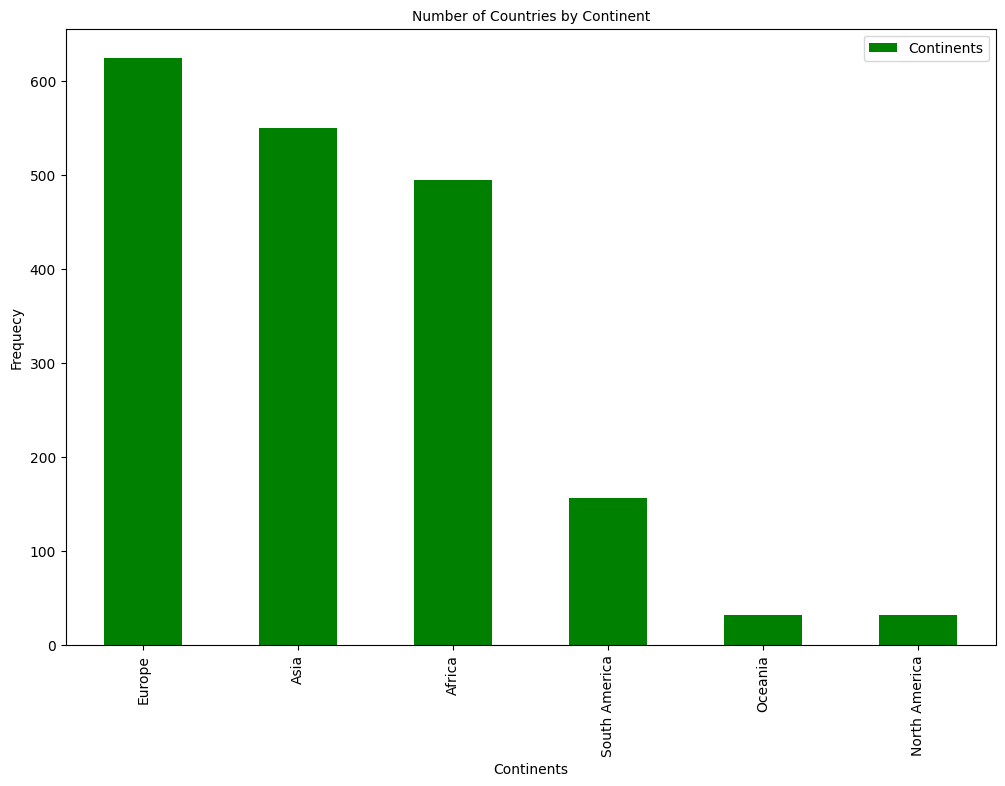

In [61]:
# Calculate the value count for the continent column...
continent_count = data["continent"].value_counts()

# Plot and formattings...
plt.figure(figsize=(12,8))
continent_count.plot(kind="bar", color="green", label="Continents")
plt.title("Number of Countries by Continent", fontsize=10)
plt.ylabel("Frequecy")
plt.xlabel("Continents")
plt.legend()
plt.show()

**Observation:**


The dataset primarily comprises countries from Europe, indicating a higher representation of European nations compared to other regions. Conversely, Oceanie (Oceania) and North America are represented by relatively fewer countries within this dataset.

This distribution of countries across continents suggests a potential skew towards European nations in the dataset, indicating a larger sample or focus on countries from Europe in comparison to those from Oceania and North America. The dataset's composition might reflect regional variations in data availability, research focus, or the specific scope of the dataset, resulting in a more extensive representation of European countries and a comparatively limited representation of countries from Oceania and North America.

#### Using relevant visualizations to help understand and communicate insights from the data.

7) Analyze the distribution of emissions by country, which can help identify countries with the highest emissions.

- Emissions (thousand metric tons of carbon dioxide) 1975 to 2020
- Emissions per capita (metric tons of carbon dioxide) 1975 to 2020

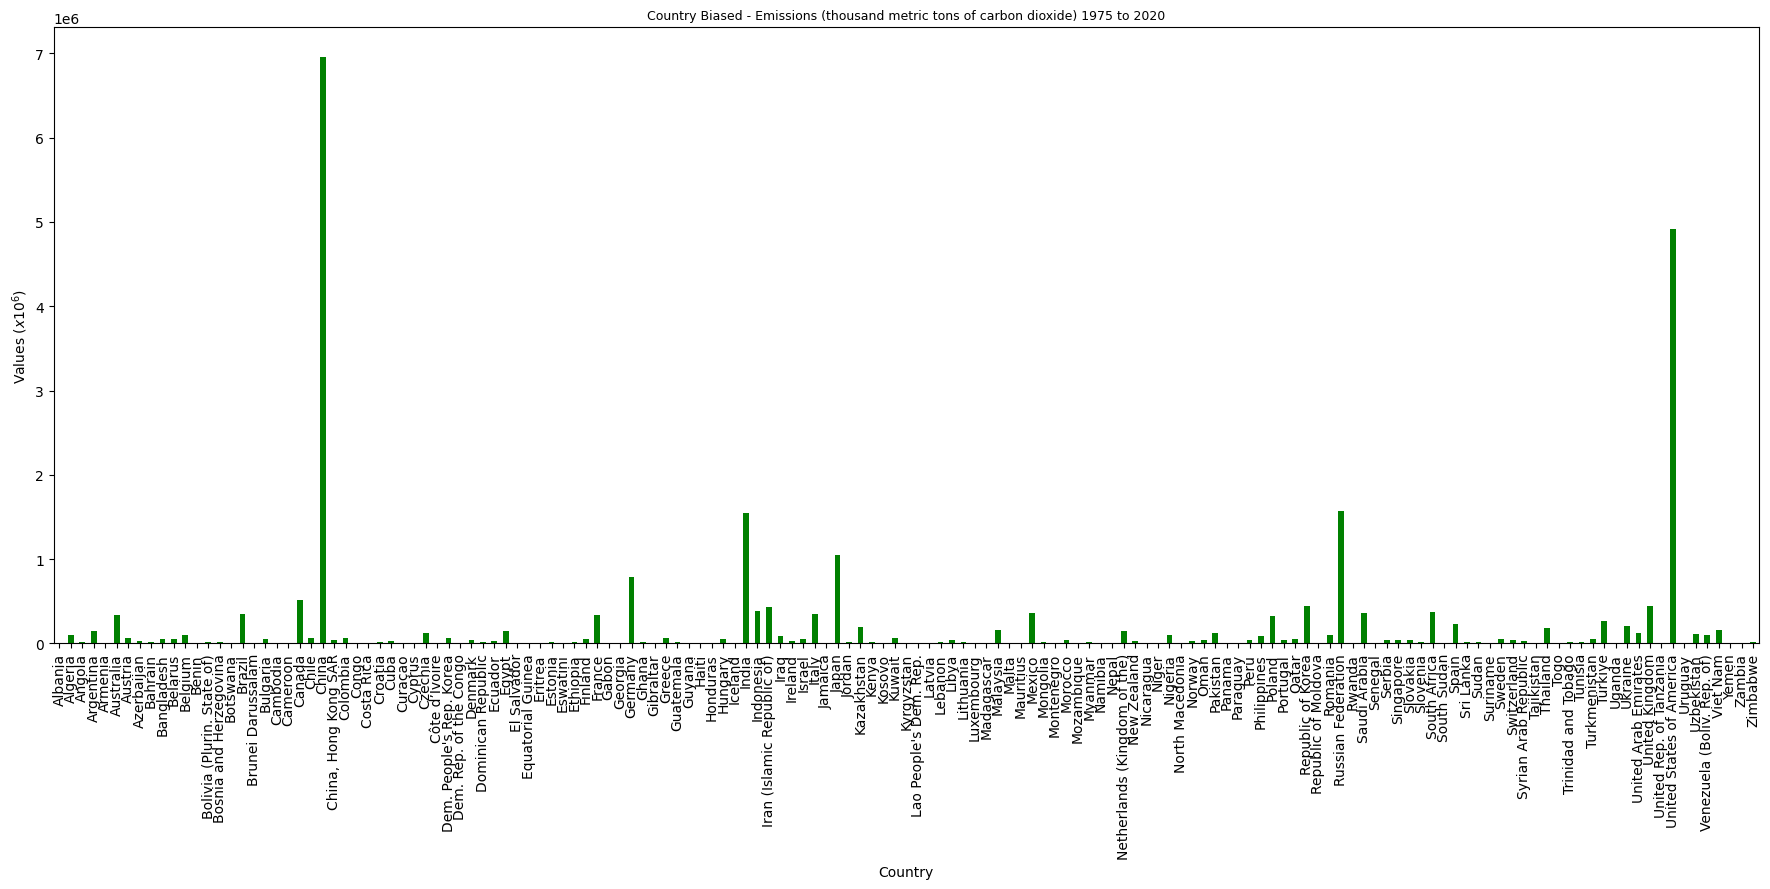

In [62]:
# Group the emission rate by the country...
# Emission Measurement (Thousand Metric Tons of Carbon Dioxide)
em_thousand_country_data = emission_thousand.groupby("Country")["Value"].mean()
plt.figure(figsize=(22,8))
ax = em_thousand_country_data.plot(kind="bar", color="green")
ax.set_title("Country Biased - Emissions (thousand metric tons of carbon dioxide) 1975 to 2020", fontsize=9)
ax.set_xlabel("Country")
ax.set_ylabel("Values ($ x 10^6$)")
plt.show()

**Observation:**

Between 1975 and 2020, China consistently held the position with the highest total carbon emissions (measured in thousand metric tons of carbon dioxide), making it the foremost contributor to global carbon emissions during this period. Following China, the United States of America consistently maintained a significant position as well, ranking second in terms of total carbon emissions over these years.

Remarkably, the cumulative carbon emissions from these two countries—China and the United States—surpassed the combined emissions of all other nations across the globe. This underlines the substantial impact and dominance of these two nations in contributing to the overall carbon emissions worldwide. Their notably high emissions signify the substantial role they played in influencing global carbon output and their considerable contributions to environmental challenges related to carbon dioxide emissions.

Text(0, 0.5, 'Values')

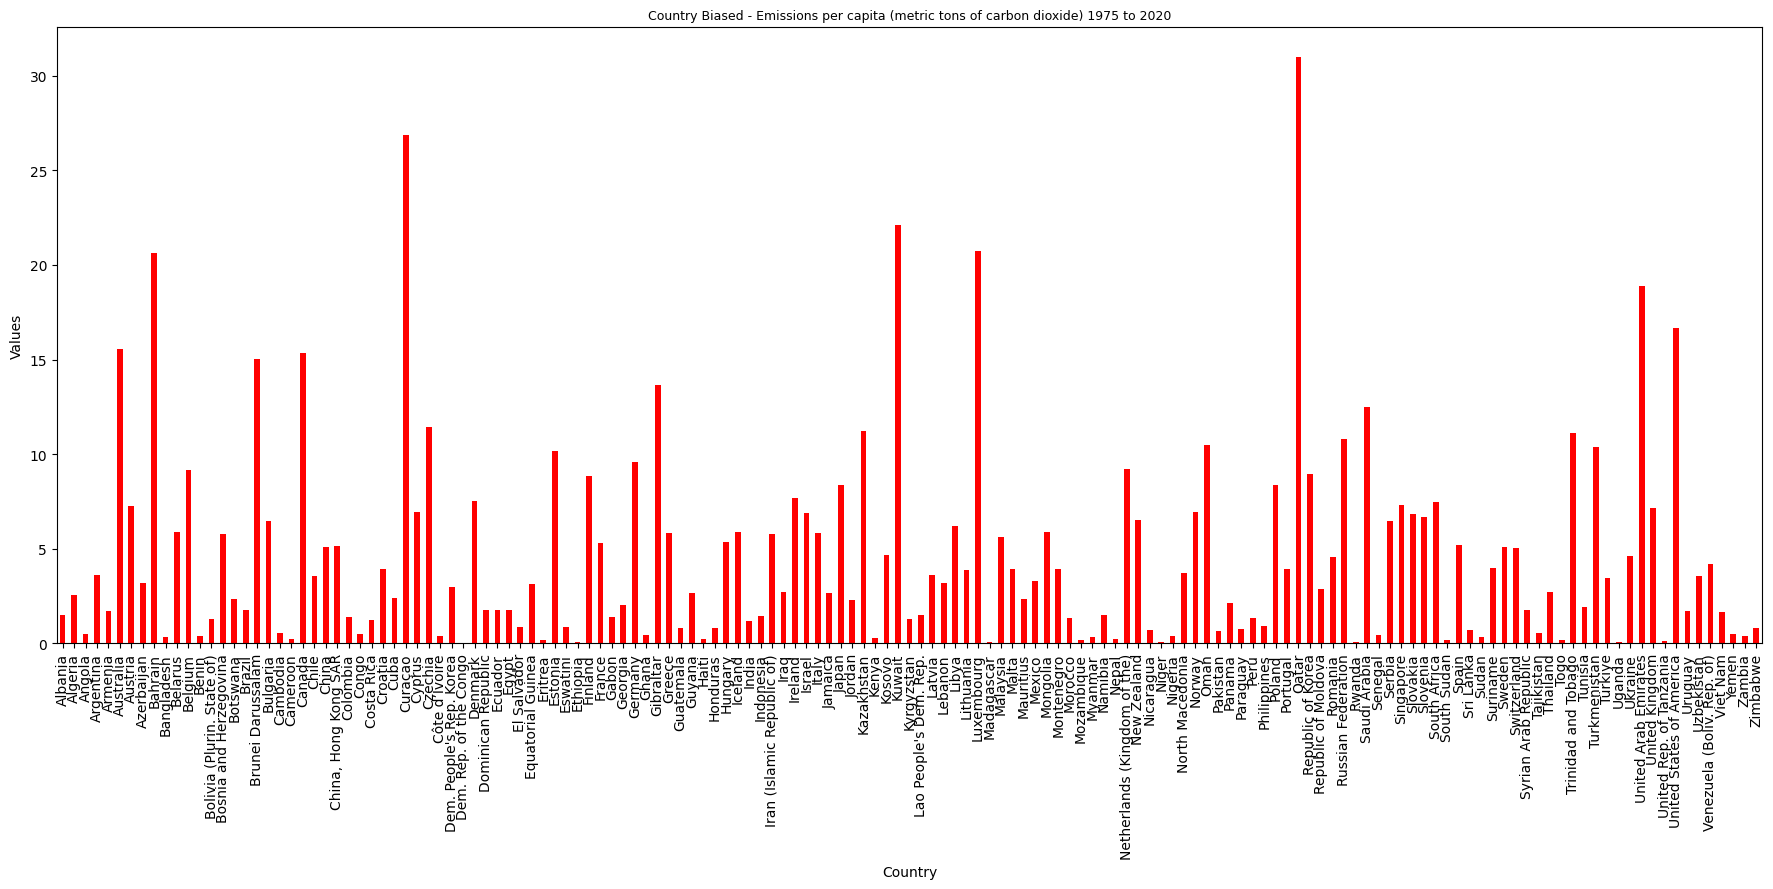

In [63]:
# Group the emission rate by the country...
# Emission Measurement (Thousand Metric Tons of Carbon Dioxide)
country_emission_per_capita_data = emission_per_capita.groupby("Country")["Value"].mean()
plt.figure(figsize=(22,8))
ax = country_emission_per_capita_data.plot(kind="bar", color="red")
ax.set_title("Country Biased - Emissions per capita (metric tons of carbon dioxide) 1975 to 2020", fontsize=9)
ax.set_xlabel("Country")
ax.set_ylabel("Values")

**Observation:**

Between 1975 and 2020, Qatar consistently maintained its position with the highest carbon emissions per capita (measured in metric tons of carbon dioxide), marking it as the leading country in this regard over the specified period. Following Qatar, Curacao consistently held a notable position as well, ranking among the top countries with high carbon emissions per capita during these years.

Additionally, concerning emissions per capita, numerous countries fell within a relatively similar range. This indicates that several nations exhibited comparable levels of carbon emissions per person, reflecting a similarity in their carbon output on a per capita basis across the examined years. This convergence among multiple countries in terms of emissions per capita suggests a similarity in certain contributing factors or levels of industrialization, energy consumption, or environmental policies impacting their carbon emission patterns during this timeframe.

8) Present information about the **total emissions** made between 1975 to 2020. Let the information be on a yearly basis for both emission categories.
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

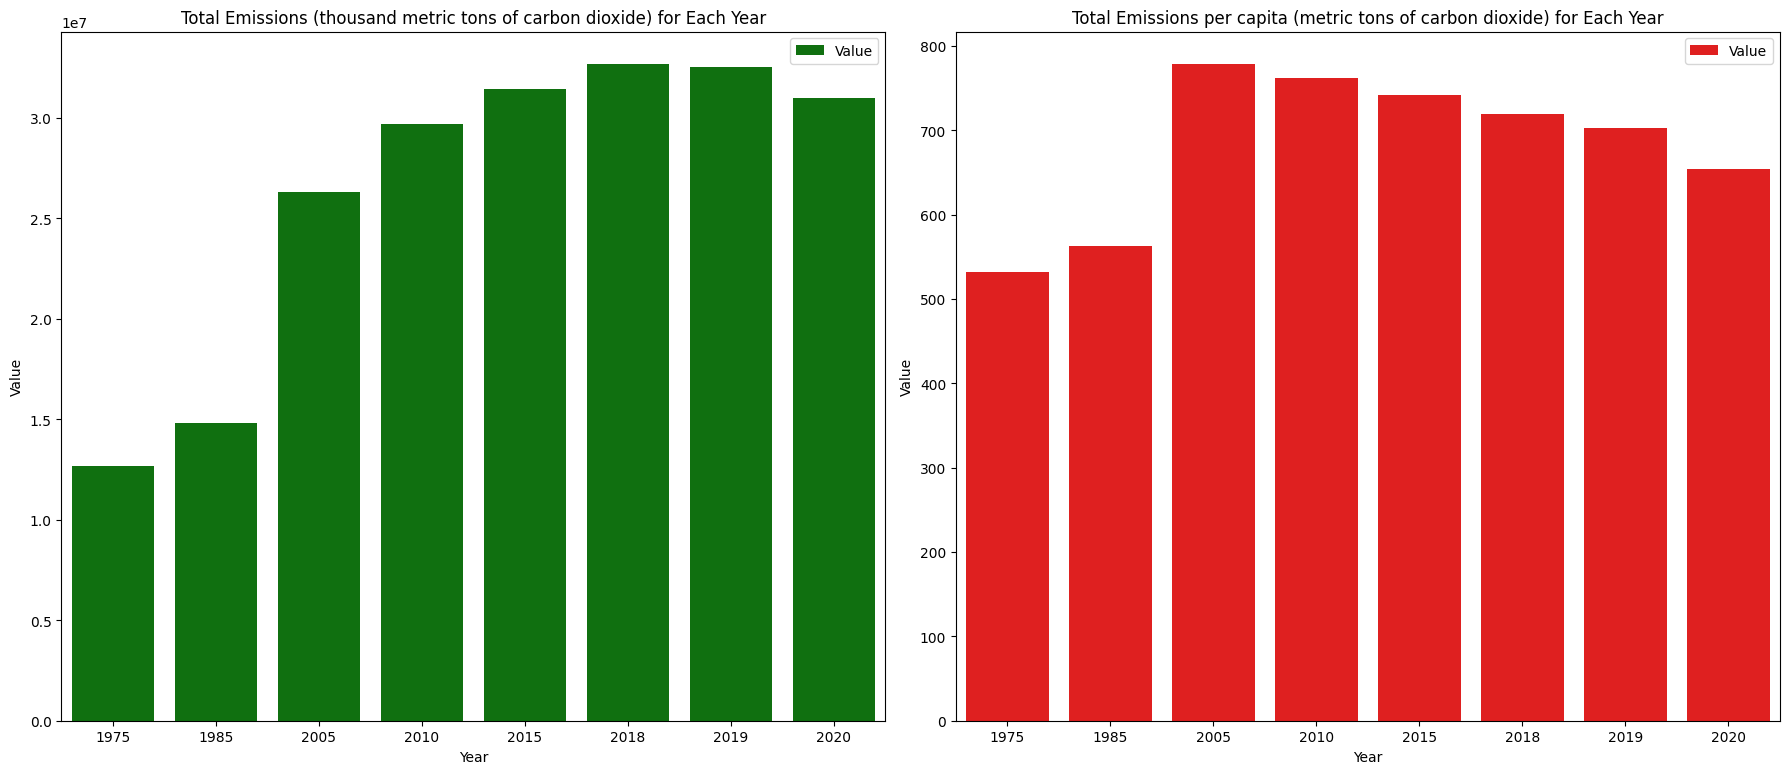

In [64]:
# total emissions for each year
df_emissions_total = emission_thousand.groupby('Year')['Value'].sum().reset_index()
df_emissions_per_capita_total = emission_per_capita.groupby('Year')['Value'].sum().reset_index()

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the total emissions
sns.barplot(x='Year', y='Value', data=df_emissions_total, ax=axes[0], color="green", label="Value")
axes[0].set_title('Total Emissions (thousand metric tons of carbon dioxide) for Each Year')

# Plot the total emissions per capita
sns.barplot(x='Year', y='Value', data=df_emissions_per_capita_total, ax=axes[1], color="red", label="Value")
axes[1].set_title('Total Emissions per capita (metric tons of carbon dioxide) for Each Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The total emissions per capita, measured in metric tons of carbon dioxide, showcased a consistent upward trend from 1975 to 2019, indicating a continuous increase in the overall amount of carbon dioxide emitted per person during this period. However, in 2020, there was a slight deviation from this trend as the total emissions per capita experienced a minor decrease compared to the previous years.

In terms of the trend specifically for total emissions per capita in metric tons of carbon dioxide, there was an upward trajectory observed up until 2005, signifying a sustained rise in the total emissions per person. Subsequently, from 2005 onwards, there has been a steady and consistent decrease in these emissions, leading to a decline observed until the year 2020. This declining trend suggests a concerted effort or various influencing factors such as advancements in technology, policy changes, or shifts in energy consumption patterns, contributing to a reduction in the total carbon emissions per person over this specified time frame.

9) Analyze the **average emissions** distributions made by all countries over 8 years (1975 - 2020) for both emission categories.
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

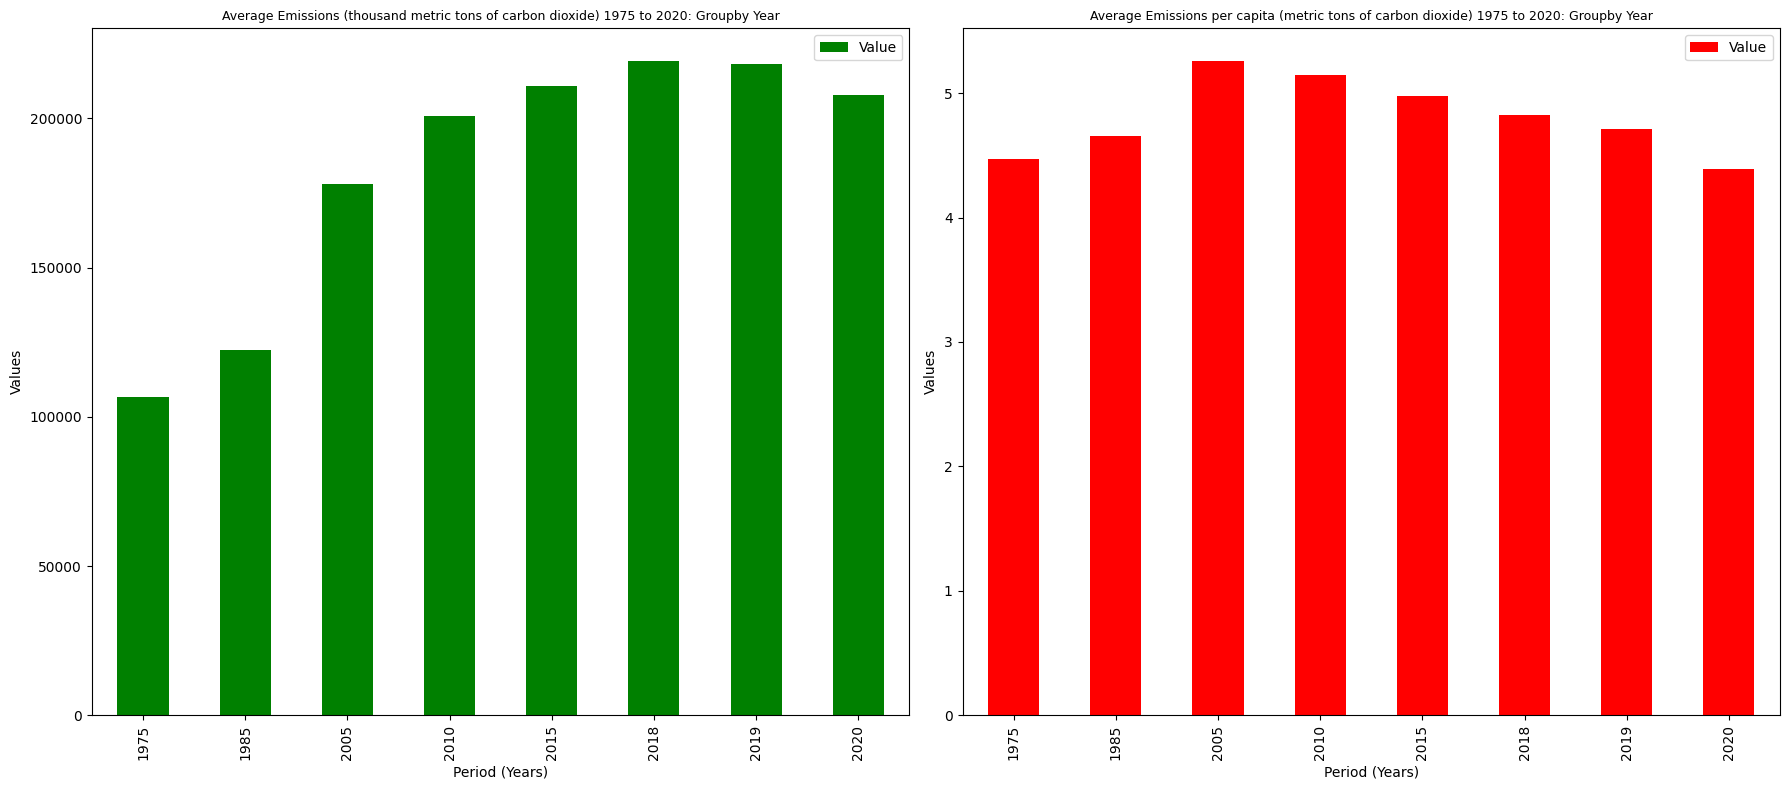

In [65]:
# Emission Measurement (Thousand Metric Tons of Carbon Dioxide)
em_thousand_year_data = emission_thousand.groupby("Year")["Value"].mean()

# Emission Measurement (Thousand Metric Tons of Carbon Dioxide)
em_per_capita_y_data = emission_per_capita.groupby("Year")["Value"].mean()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Emissions (thousand metric tons of carbon dioxide)
em_thousand_year_data.plot(kind="bar", ax=axes[0], color="green", label="Value")
axes[0].set_title("Average Emissions (thousand metric tons of carbon dioxide) 1975 to 2020: Groupby Year", fontsize=9)
axes[0].set_xlabel("Period (Years)")
axes[0].set_ylabel("Values")
axes[0].legend()

# Plot for Emissions per capita (metric tons of carbon dioxide)
em_per_capita_y_data.plot(kind="bar", ax=axes[1], color="red", label="Value")
axes[1].set_title("Average Emissions per capita (metric tons of carbon dioxide) 1975 to 2020: Groupby Year", fontsize=9)
axes[1].set_xlabel("Period (Years)")
axes[1].set_ylabel("Values")
axes[1].legend()

plt.tight_layout()
plt.show()

**Observation:**

The average emissions per capita, measured in metric tons of carbon dioxide, exhibited a general upward trend from 1975 to 2019, indicating a consistent increase in the amount of carbon dioxide emitted per person during this period. However, in 2020, there was a slight deviation from this trend as the average emissions per capita experienced a minor decrease compared to the previous years.

Regarding the trend specifically for average emissions per capita in metric tons of carbon dioxide, there was an upward trajectory observed up until 2005, showcasing a continuous rise in the emissions per person. Subsequently, from 2005 onward, there has been a steady and consistent decrease in these emissions, culminating in a decline observed up to the year 2020. This declining trend indicates a sustained effort or changes in various factors such as technological advancements, policy implementations, or shifts in energy sources, resulting in a reduction in the average carbon emissions per person over this time frame.

10) Rank the countries (Top 10 and Last 10) based on each emission categories.
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

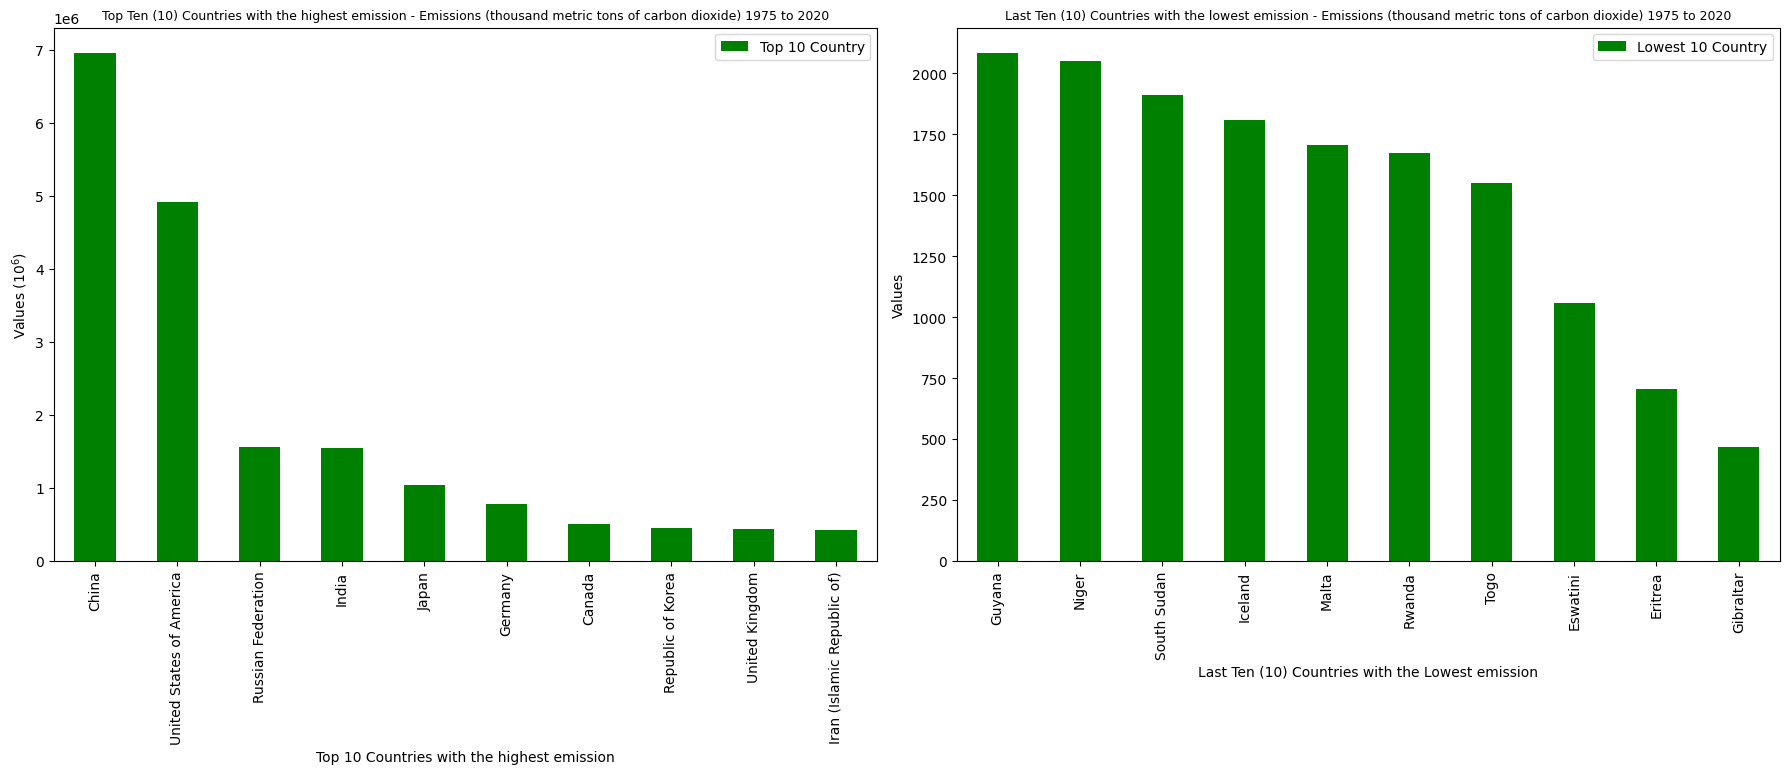

In [66]:
# Generate countries with the highest emission... (Top 10)
em_thousand_country_data = emission_thousand.groupby("Country")["Value"].mean()
em_thousand_country_data.sort_values(ascending=False, inplace=True)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Top Ten (10) Countries with the highest emission
em_thousand_country_data_top_10 = em_thousand_country_data.head(10)
em_thousand_country_data_top_10.plot(kind="bar", ax=axes[0], color="green", label="Top 10 Country")
axes[0].set_title("Top Ten (10) Countries with the highest emission - Emissions (thousand metric tons of carbon dioxide) 1975 to 2020", fontsize=9)
axes[0].set_xlabel("Top 10 Countries with the highest emission")
axes[0].set_ylabel("Values ($10^6$)")
axes[0].legend()

# Plot for Last Ten (10) Countries with the lowest emission
em_thousand_country_data_last_10 = em_thousand_country_data.tail(10)
em_thousand_country_data_last_10.plot(kind="bar", ax=axes[1], color="green", label="Lowest 10 Country")
axes[1].set_title("Last Ten (10) Countries with the lowest emission - Emissions (thousand metric tons of carbon dioxide) 1975 to 2020", fontsize=9)
axes[1].set_xlabel("Last Ten (10) Countries with the Lowest emission")
axes[1].set_ylabel("Values")
axes[1].legend()

plt.tight_layout()
plt.show()


**Observation:**

Within the top 10 countries globally, China and the USA notably lead in terms of the highest overall carbon emissions. Both nations exhibit substantial carbon outputs, reflecting their significant industrial and economic activities that contribute considerably to global carbon dioxide emissions.

Conversely, among the countries with the lowest carbon emissions, a considerable proportion comprises African nations. This suggests that many African countries have comparatively lower levels of total carbon emissions, potentially stemming from factors such as smaller industrial footprints, lower energy consumption rates, or reliance on cleaner energy sources. The disparity between these top emitters and the least emitting countries often underscores the diverse landscape of carbon emissions across the globe, influenced by varying levels of economic development, industrialization, and environmental policies.

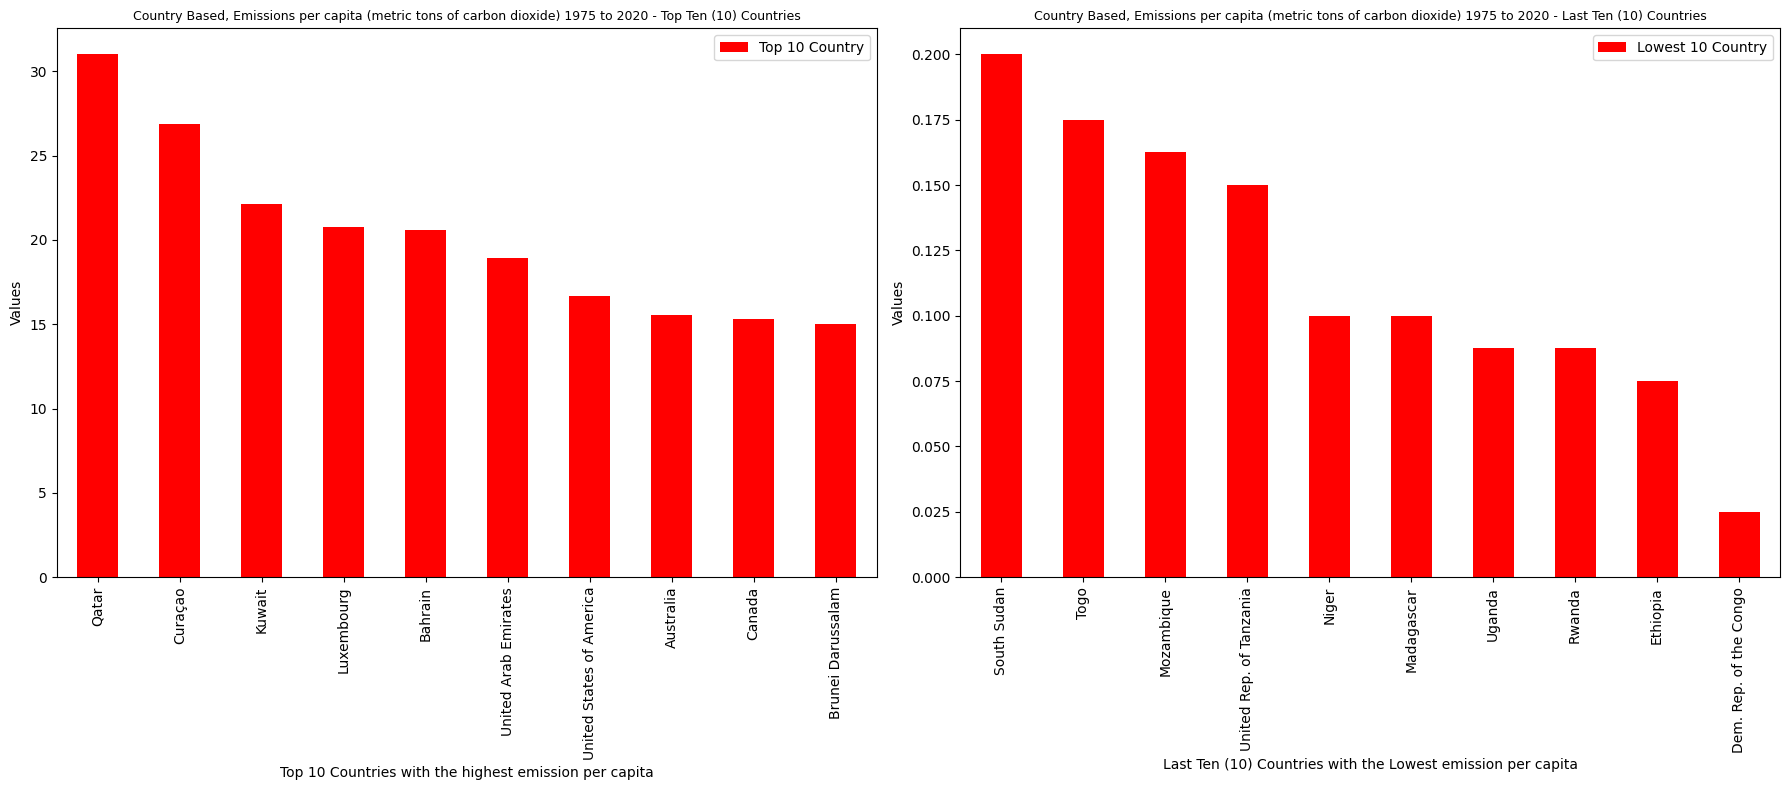

In [67]:
# Generate countries with the highest emission per capita... (Top 10)
em_per_country_data = emission_per_capita.groupby("Country")["Value"].mean()
em_per_country_data.sort_values(ascending=False, inplace=True)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Top Ten (10) Countries with the highest emission per capita
emission_per_capita_top_10 = em_per_country_data.head(10)
emission_per_capita_top_10.plot(kind="bar", ax=axes[0], color="red", label = "Top 10 Country")
axes[0].set_title("Country Based, Emissions per capita (metric tons of carbon dioxide) 1975 to 2020 - Top Ten (10) Countries", fontsize=9)
axes[0].set_xlabel("Top 10 Countries with the highest emission per capita")
axes[0].set_ylabel("Values")
axes[0].legend()

# Plot for Last Ten (10) Countries with the lowest emission per capita
emission_per_capita_last_10 = em_per_country_data.tail(10)
emission_per_capita_last_10.plot(kind="bar", ax=axes[1], color="red", label="Lowest 10 Country")
axes[1].set_title("Country Based, Emissions per capita (metric tons of carbon dioxide) 1975 to 2020 - Last Ten (10) Countries", fontsize=9)
axes[1].set_xlabel("Last Ten (10) Countries with the Lowest emission per capita")
axes[1].set_ylabel("Values")
axes[1].legend()

plt.tight_layout()
plt.show()

**Observation:**

Among the top 10 countries with the highest carbon emissions per capita, Qatar and Curacao stand out prominently, demonstrating notably elevated levels of emissions per person compared to other nations. These countries reflect a substantial environmental footprint attributed to their industrial activities, energy consumption patterns, or economic structures.

Conversely, among the countries with the lowest carbon emissions per capita, a significant portion comprises African nations. This suggests that many African countries exhibit lower levels of individual carbon emissions relative to other regions globally. This disparity in carbon output may be influenced by various factors, including differing levels of industrialization, economic development, access to cleaner energy sources, and national policies aimed at environmental sustainability.

11) Select five countries from the dataset and create a bar plot illustrating their individual CO2 emissions over the specified time period. Categorize the emissions into their respective available groups.
- Emissions (thousand metric tons of carbon dioxide)
- Emissions per capita (metric tons of carbon dioxide)

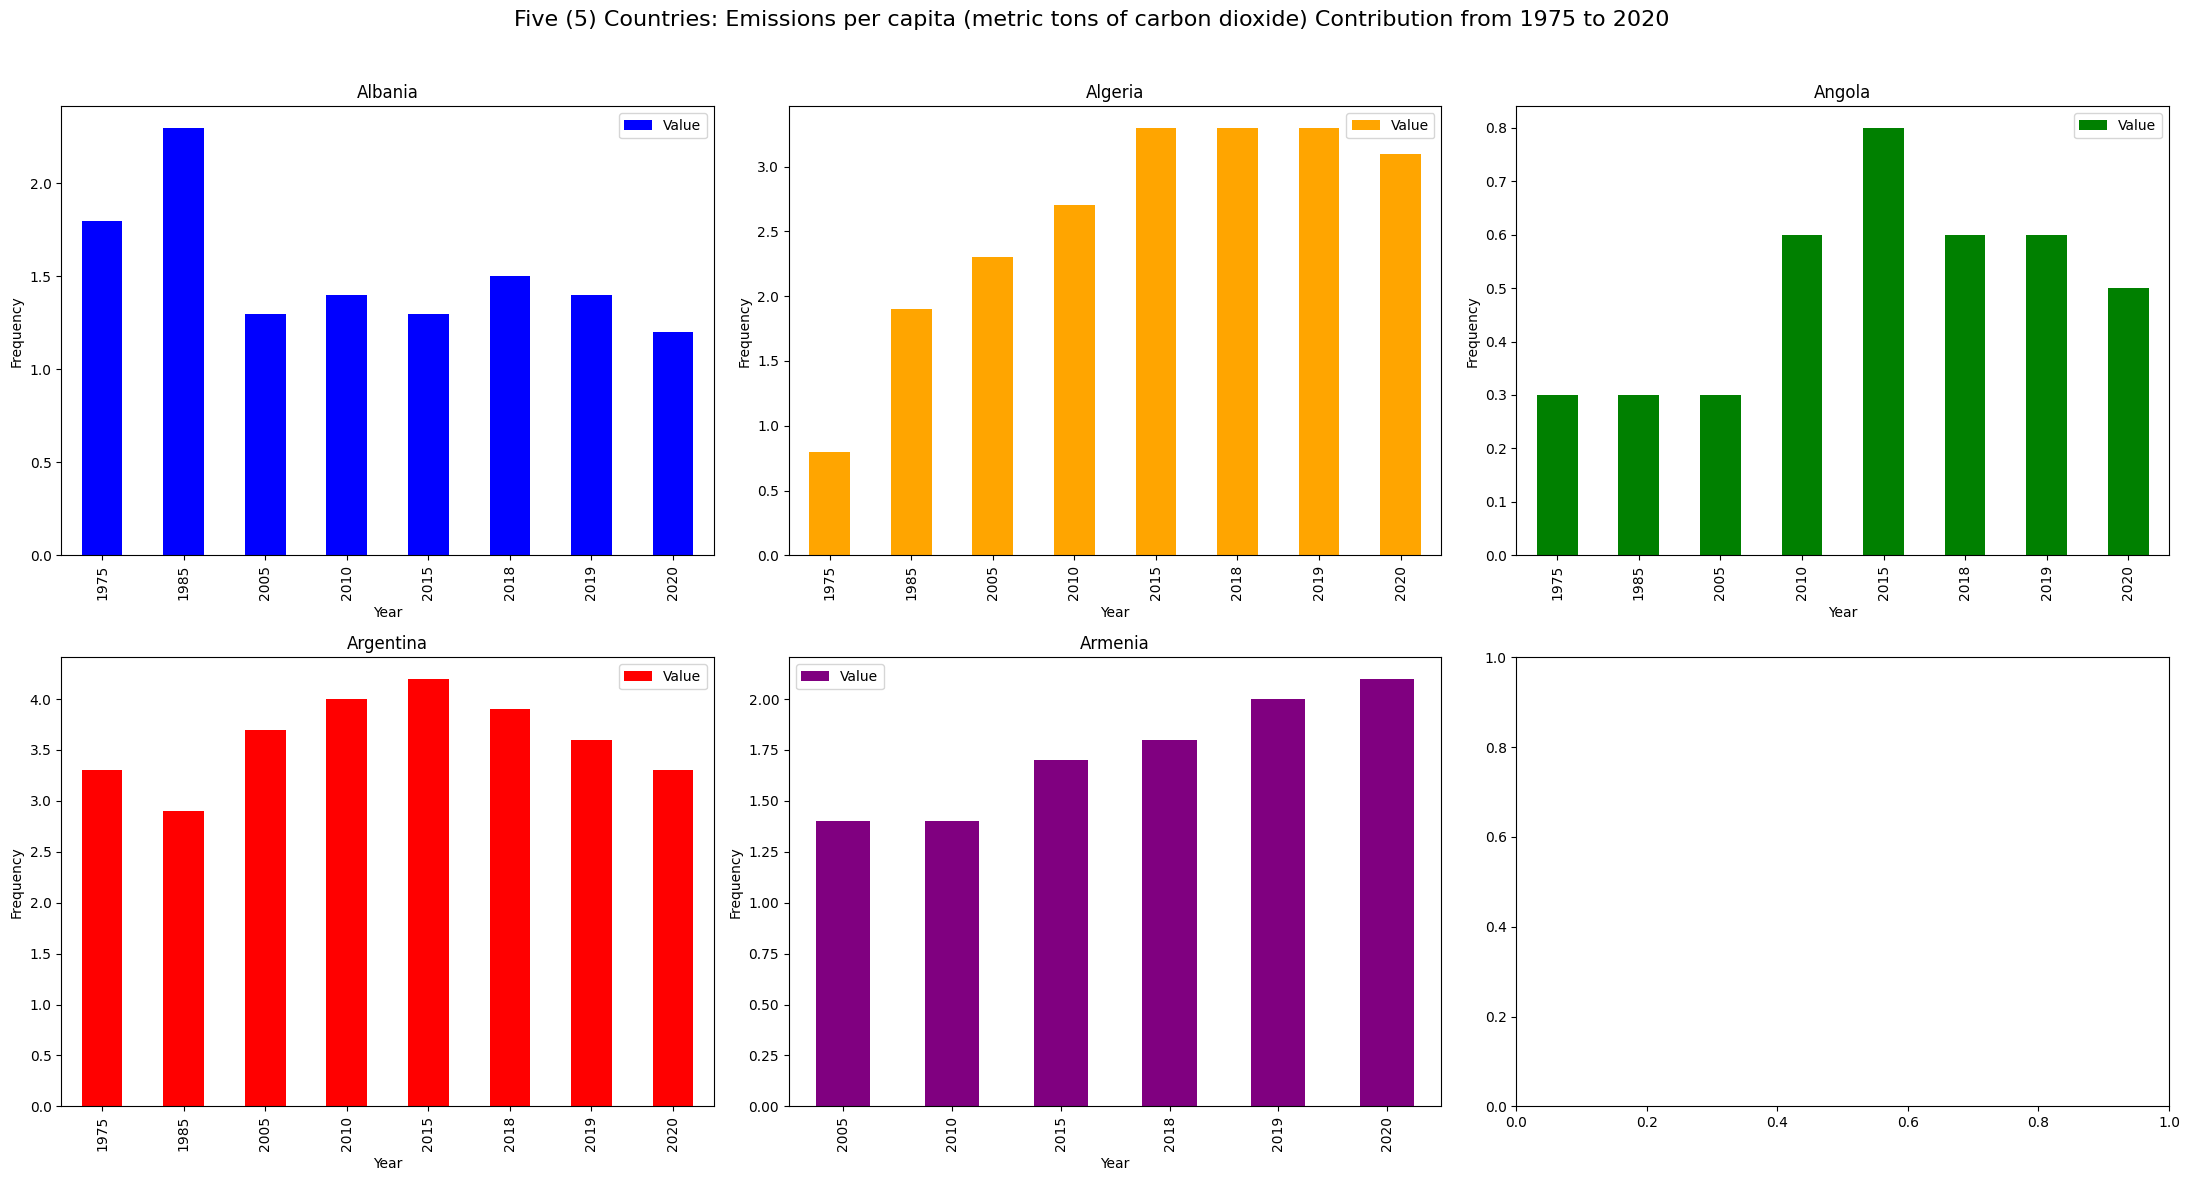

In [68]:
# Define colors for better visibility
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create a figure and axes outside the loop
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 12))
fig.suptitle('Five (5) Countries: Emissions per capita (metric tons of carbon dioxide) Contribution from 1975 to 2020 ', fontsize=16)

# Flatten the 2x3 array of axes to make indexing easier
axes = axes.flatten()

for i, country in enumerate(emission_per_capita["Country"].unique()[:5]):
    country_extracted_emission_per_capita = emission_per_capita[emission_per_capita["Country"] == country]

    extracted = country_extracted_emission_per_capita[["Year", "Value"]]
    extracted_2 = extracted.groupby("Year").sum()
    extracted_2.reset_index(inplace=True)
    extracted_2.set_index("Year", inplace=True)

    # Plot on the appropriate subplot
    extracted_2.plot(kind="bar", ax=axes[i], color=colors[i])
    axes[i].set_title(f"{country}", fontsize=12)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Frequency")
    axes[i].legend().set_visible(True)  

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Observation:**

In 1985, Albania stood out with the highest levels of carbon emissions per person, indicating a significant environmental impact relative to other years. Conversely, by 2015, Angola had taken the lead in this aspect, signifying a considerable rise in carbon emissions per capita compared to other years.

Moreover, Armenia experienced a consistent and notable escalation in its carbon emissions per person starting from the year 2010. This steady increase highlighted a concerning trend, indicating a continuous and possibly accelerating impact on the environment from the nation's activities and energy consumption during that period.

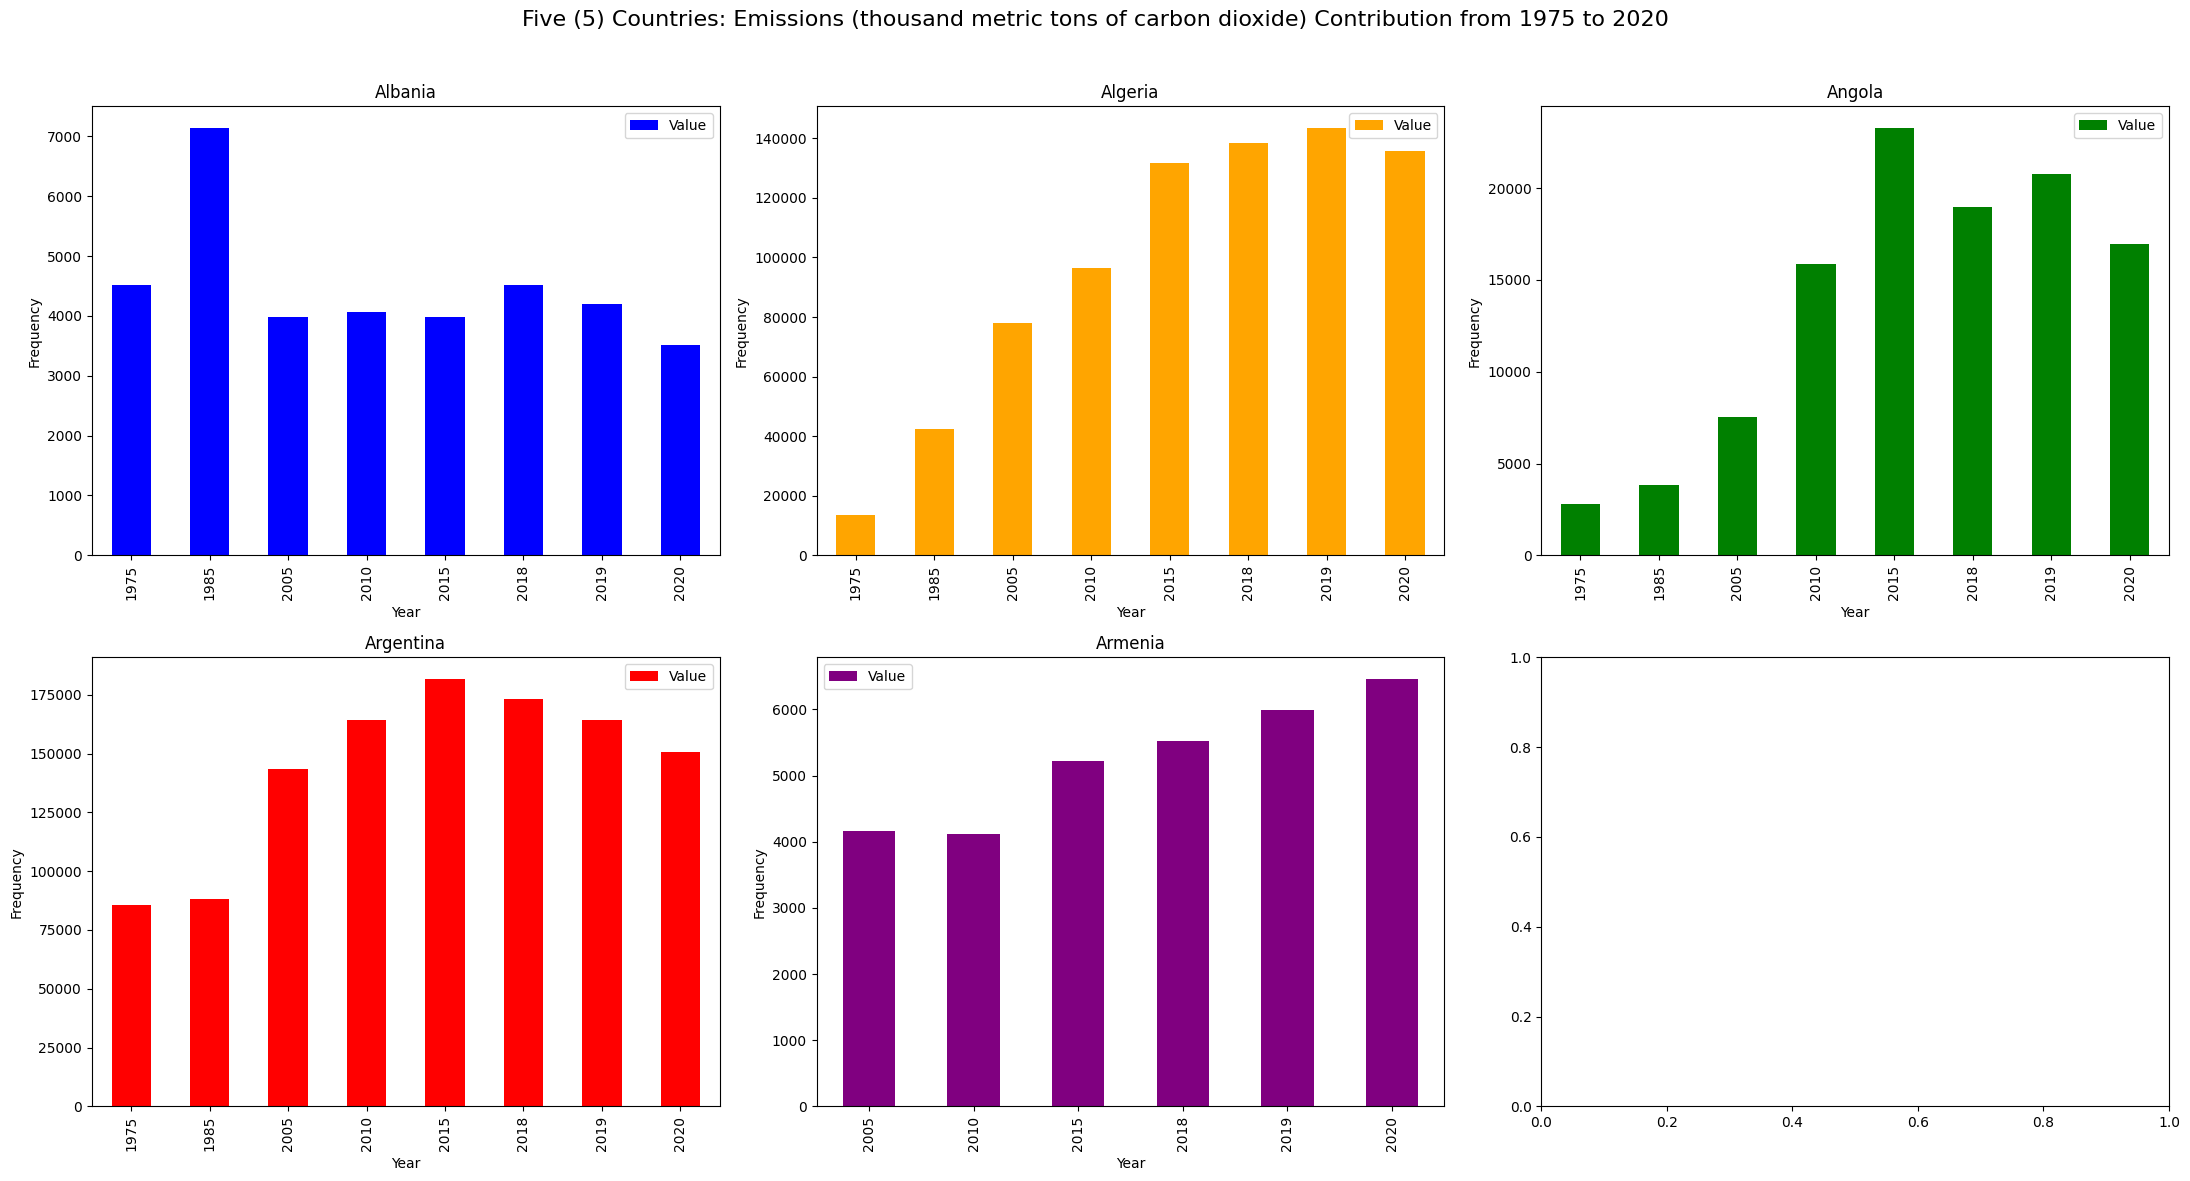

In [69]:
# Define colors for better visibility
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create a figure and axes outside the loop
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 12))
fig.suptitle('Five (5) Countries: Emissions (thousand metric tons of carbon dioxide) Contribution from 1975 to 2020', fontsize=16)

# Flatten the 2x3 array of axes to make indexing easier
axes = axes.flatten()

for i, country in enumerate(emission_thousand["Country"].unique()[:5]):
    country_extracted_emission_thousand = emission_thousand[emission_thousand["Country"] == country]

    em_thousand_extracted = country_extracted_emission_thousand[["Year", "Value"]]
    em_thousand_extracted_2 = em_thousand_extracted.groupby("Year").sum()
    em_thousand_extracted_2.reset_index(inplace=True)
    em_thousand_extracted_2.set_index("Year", inplace=True)

    # Plot on the appropriate subplot
    em_thousand_extracted_2.plot(kind="bar", ax=axes[i], color=colors[i])
    axes[i].set_title(f"{country}", fontsize=12)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Frequency")
    axes[i].legend().set_visible(True)  

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

For both Algeria and Armenia, the "Emissions" measured in thousand metric tons of carbon dioxide showcased a consistent and steady increase leading up to the year 2019. This pattern suggests a continual rise in the total carbon dioxide emissions over the years for these two countries, indicating a progressive trend in their carbon output until the year 2019.

In contrast, for Albania, the emissions displayed a different trajectory. Specifically, for Albania, the emissions remained relatively steady from 2005 onward. This suggests that after 2005, Albania maintained a consistent level of carbon dioxide emissions without experiencing significant fluctuations or notable increases in the total emissions over the following years, indicating a period of stability in their carbon output from that point onward.

12) Examine the dataset to determine whether there are observable changes in the contribution patterns of the top five (5) CO2 contributors.<br>
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

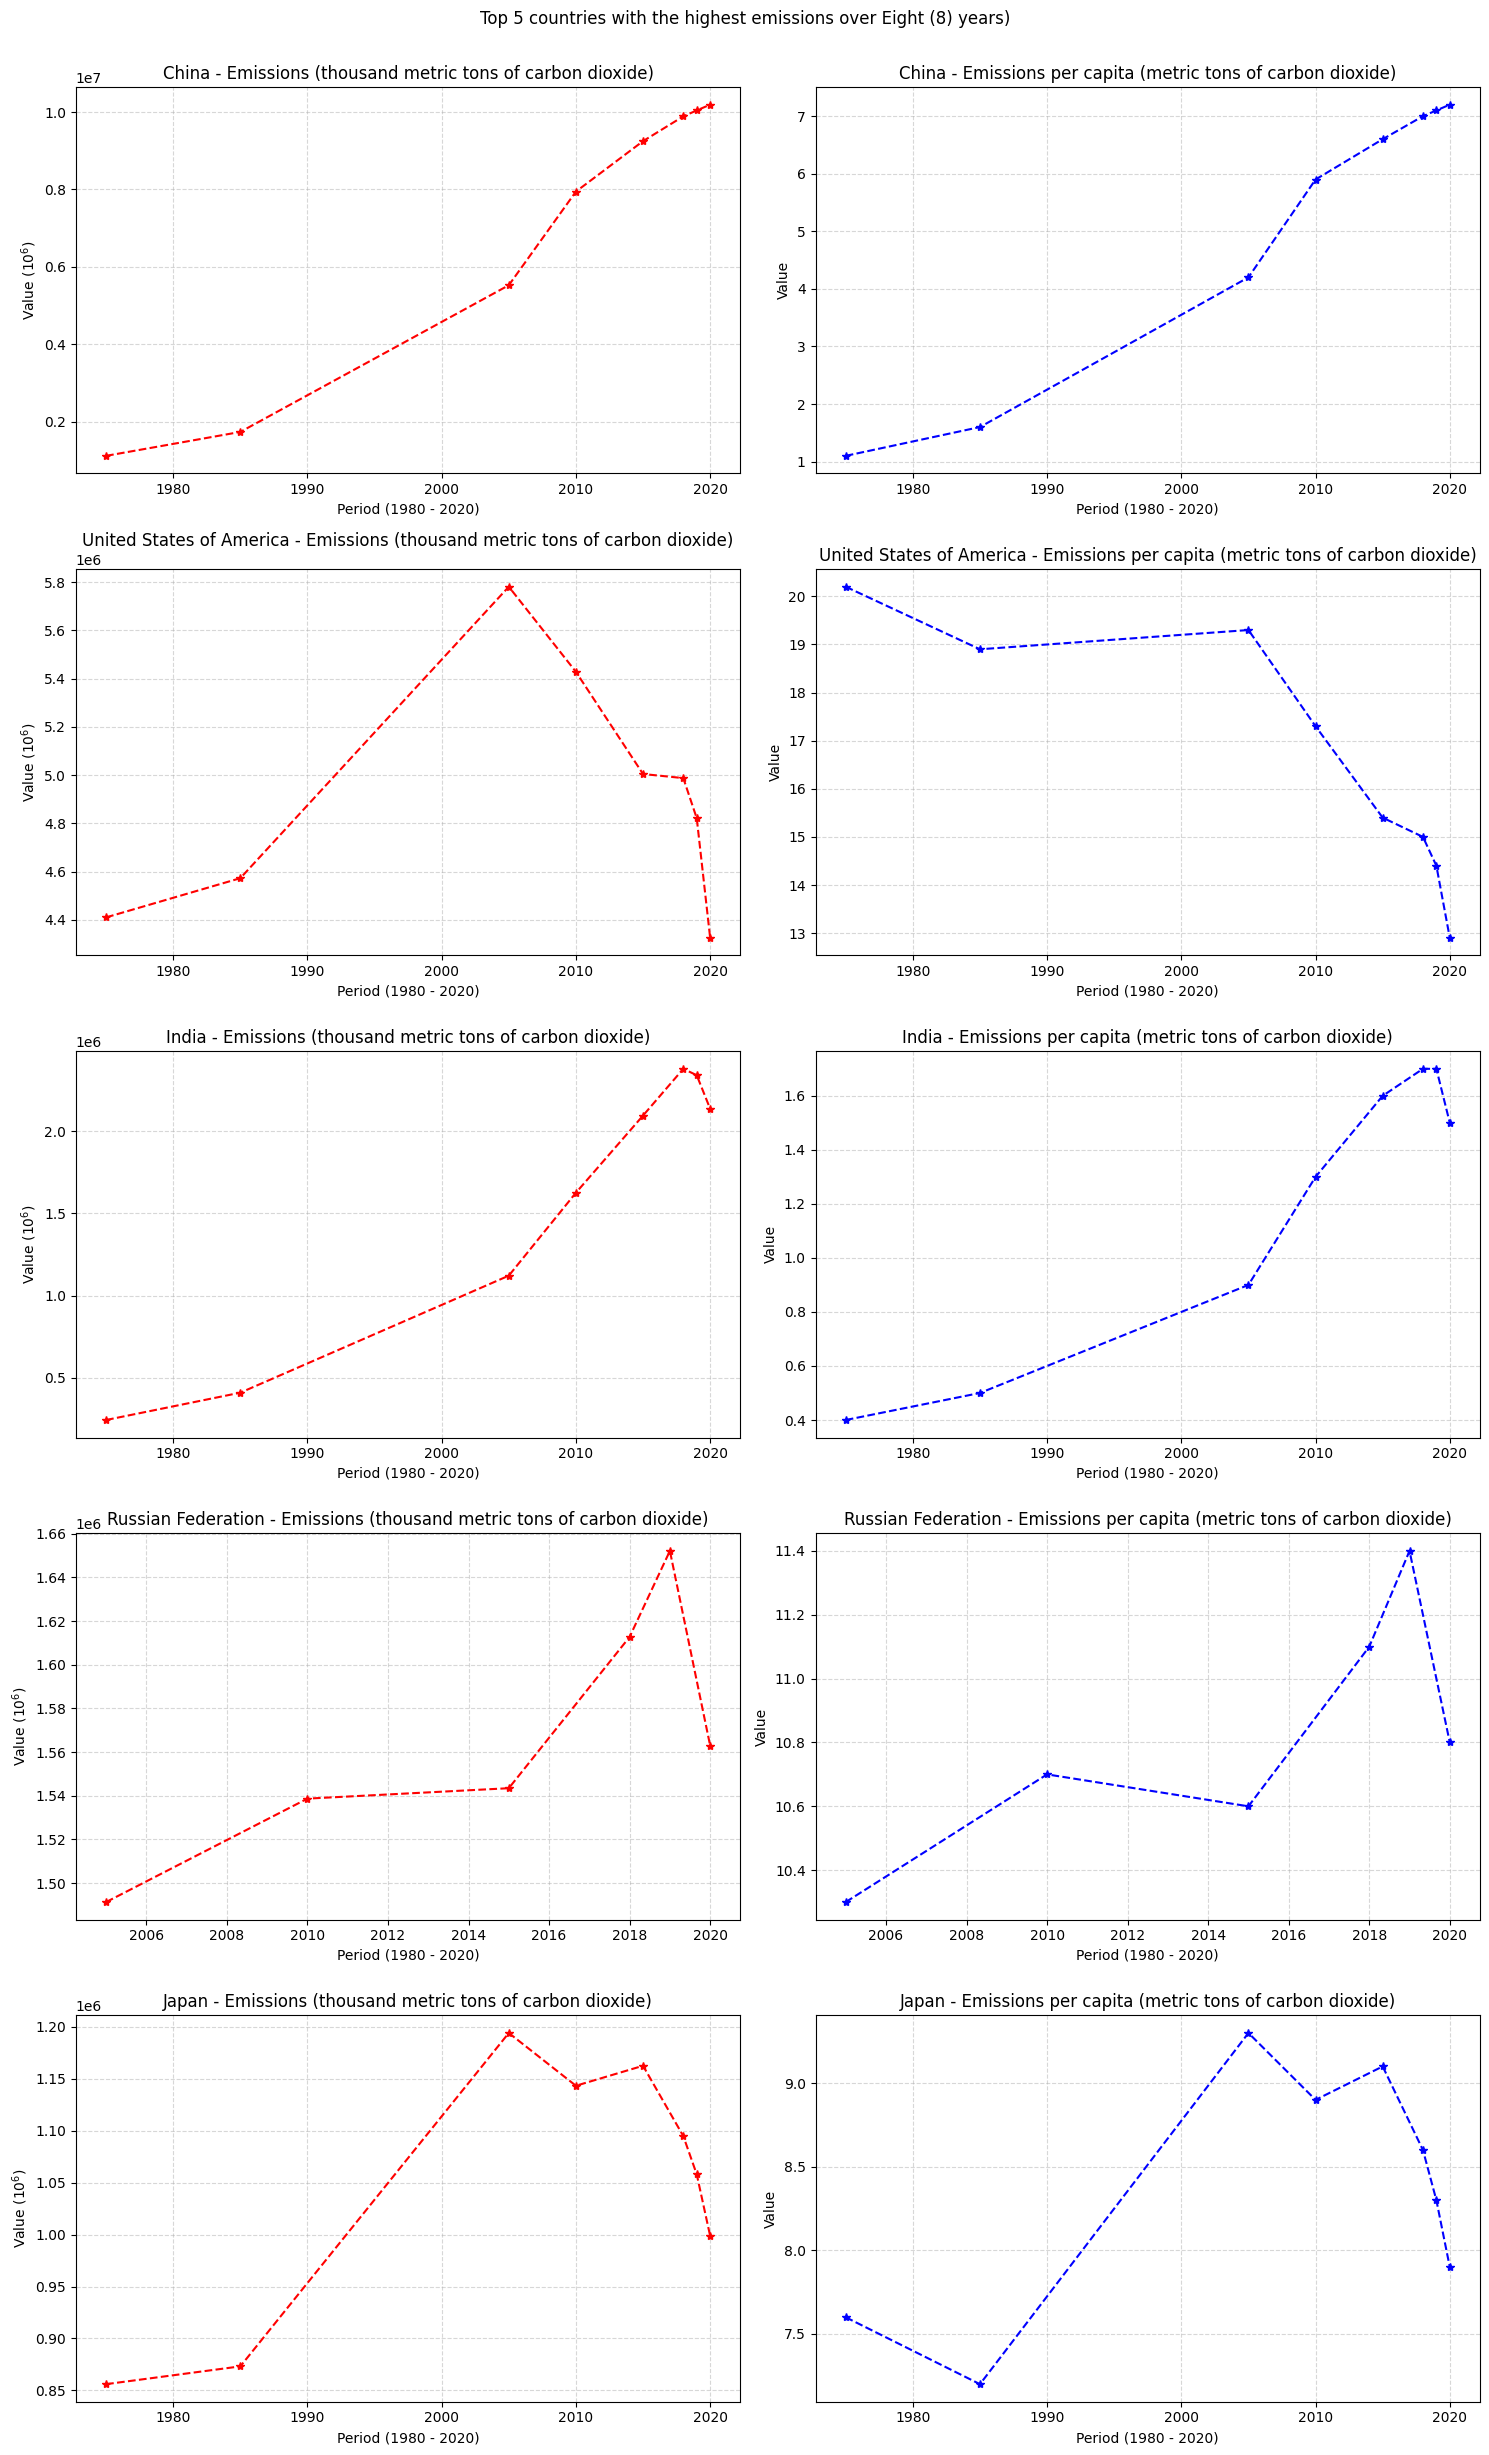

In [70]:
#  two dataframes for each emission category
df_emissions = data[data['Series'] == 'Emissions (thousand metric tons of carbon dioxide)']
df_emissions_per_capita = data[data['Series'] == 'Emissions per capita (metric tons of carbon dioxide)']

# the top 5 countries with the highest total emissions
top_countries = df_emissions.groupby('Country')['Value'].sum().nlargest(5).index.tolist()

#  include only the top countries
df_emissions_top = df_emissions[df_emissions['Country'].isin(top_countries)]
df_emissions_per_capita_top = df_emissions_per_capita[df_emissions_per_capita['Country'].isin(top_countries)]

# Visualize each country's emission over 8 years
fig, axs = plt.subplots(len(top_countries), 2, figsize=(15, len(top_countries)*5))
fig.suptitle('Top 5 countries with the highest emissions over Eight (8) years)\n\n ', fontsize=12)

for i, country in enumerate(top_countries):
    axs[i, 0].plot(df_emissions_top[df_emissions_top['Country'] == country]['Year'], df_emissions_top[df_emissions_top['Country'] == country]['Value'], "r--*", label=country)
    axs[i, 0].set_title(f'{country} - Emissions (thousand metric tons of carbon dioxide)')
    axs[i, 0].set_xlabel("Period (1980 - 2020)")
    axs[i, 0].set_ylabel("Value ($10^6$)")
    axs[i, 0].grid(True, linestyle="--", alpha=0.5)
    
    axs[i, 1].plot(df_emissions_per_capita_top[df_emissions_per_capita_top['Country'] == country]['Year'], df_emissions_per_capita_top[df_emissions_per_capita_top['Country'] == country]['Value'], "b--*", label=country)
    axs[i, 1].set_title(f'{country} - Emissions per capita (metric tons of carbon dioxide)')
    axs[i, 1].set_xlabel("Period (1980 - 2020)")
    axs[i, 1].set_ylabel("Value")
    axs[i, 1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()

plt.show()

**Observation:**

The carbon emissions from China have exhibited a consistent and steady upward trend starting from 1980 up to the present day. This prolonged period has seen continuous growth in China's carbon dioxide emissions, indicating a consistent rise in the country's overall carbon output over these years.

In contrast, the United States experienced an increase in carbon emissions until 2005, after which there was a significant decrease observed. This decline was substantial enough that the emissions in the present day almost resemble the levels recorded in 1980. This pattern suggests a notable shift in the United States' emissions trajectory, with a peak around 2005 followed by a significant and sustained reduction in carbon emissions.

India showcased an increase in carbon emissions until 2019, after which a decline began, resembling a similar trend seen in Russia. Both countries exhibited a rise in carbon emissions until a certain point, followed by a subsequent decrease or leveling off of emissions in the more recent years.

Japan's carbon emissions increased until 2005 and then began to decrease gradually. This pattern illustrates a period of rising emissions until a certain point, after which Japan initiated a trend of decreasing carbon output.

These distinct trends in carbon emissions across various countries highlight diverse patterns of development, policy changes, or technological advancements affecting each nation's environmental impact and carbon output over the specified time frames.

13) Identify and analyze the five (5) countries exhibiting the lowest emissions within the timeframe spanning from 1975 to 2020 <br>
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

In [71]:
#  two dataframes for each emission category
df_emissions = data[data['Series'] == 'Emissions (thousand metric tons of carbon dioxide)']
df_emissions_per_capita = data[data['Series'] == 'Emissions per capita (metric tons of carbon dioxide)']

# the five (5) countries with the lowest total emissions
five_em_thousand_countries = df_emissions.groupby('Country')['Value'].sum().nsmallest(5)
five_em_per_capita_countries = df_emissions_per_capita.groupby('Country')['Value'].sum().nsmallest(5)

print("\n Five Countries with the lowest CO2 emission (Emissions (thousand metric tons of carbon dioxide)) ")
print(five_em_thousand_countries)
print("\n Five Countries with the lowest CO2 emission (Emissions per capita (metric tons of carbon dioxide)) ")
print(five_em_per_capita_countries)


 Five Countries with the lowest CO2 emission (Emissions (thousand metric tons of carbon dioxide)) 
Country
Gibraltar       3730.0
Eritrea         4224.0
South Sudan     7652.0
Eswatini        8482.0
Togo           12396.0
Name: Value, dtype: float64

 Five Countries with the lowest CO2 emission (Emissions per capita (metric tons of carbon dioxide)) 
Country
Dem. Rep. of the Congo    0.2
Ethiopia                  0.6
Rwanda                    0.7
Uganda                    0.7
Madagascar                0.8
Name: Value, dtype: float64


In [72]:
print(f"Missing Values in Emissions (thousand metric tons of carbon dioxide) are: {df_emissions['Value'].isna().sum()}")
print(f"Missing Values in Emissions per capita (metric tons of carbon dioxide) are: {df_emissions_per_capita['Value'].isna().sum()}")

Missing Values in Emissions (thousand metric tons of carbon dioxide) are: 0
Missing Values in Emissions per capita (metric tons of carbon dioxide) are: 0


14) Conduct a comprehensive ranking of African countries based on their emission rates, organizing the results in a descending order for clarity and insight.<br>
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

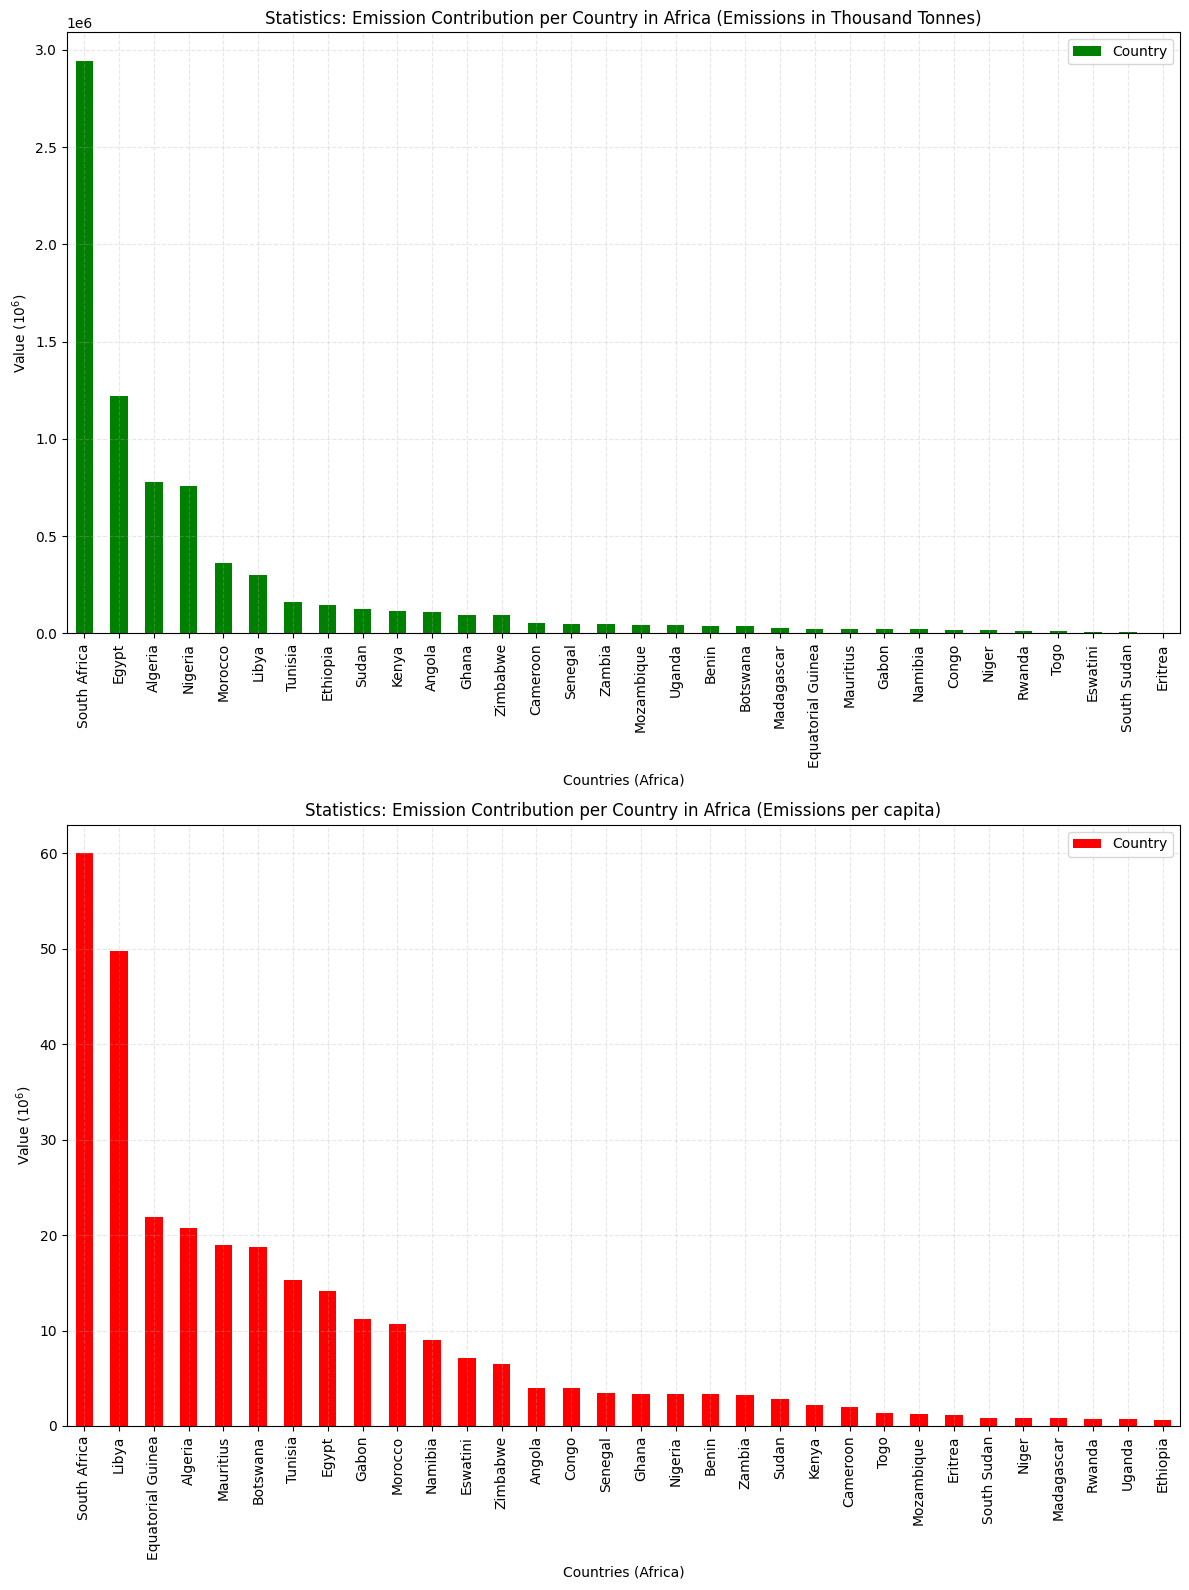

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Emissions in Thousand Tonnes for Africa
em_thousand_africa = emission_thousand[emission_thousand["continent"] == "Africa"]
em_thousand_africa = em_thousand_africa.groupby("Country")["Value"].sum()
em_thousand_africa.sort_values(ascending=False, inplace=True)
em_thousand_africa.plot(kind="bar", ax=axes[0], color="green", label="Country")
axes[0].set_title('Statistics: Emission Contribution per Country in Africa (Emissions in Thousand Tonnes)')
axes[0].set_xlabel("Countries (Africa)")
axes[0].set_ylabel("Value ($10^6$)")
axes[0].grid(True, linestyle="--", alpha=0.3)
axes[0].legend()

# Emissions per capita (metric tons of carbon dioxide) for Africa
em_per_capita_africa = emission_per_capita[emission_per_capita["continent"] == "Africa"]
em_per_capita_africa = em_per_capita_africa.groupby("Country")["Value"].sum()
em_per_capita_africa.sort_values(ascending=False, inplace=True)
em_per_capita_africa.plot(kind="bar", ax=axes[1], color="red", label="Country")
axes[1].set_title('Statistics: Emission Contribution per Country in Africa (Emissions per capita)')
axes[1].set_xlabel("Countries (Africa)")
axes[1].set_ylabel("Value ($10^6$)")
axes[1].grid(True, linestyle="--", alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

In the context of Africa, South Africa emerges as the leading country in terms of carbon emissions, surpassing other nations within the continent. Following South Africa, Egypt stands out as a notable contributor to carbon emissions, with its emissions roughly around half of South Africa's levels. This comparison suggests a significant gap in emissions between these two countries, with Egypt having a substantial but comparatively lower carbon output than South Africa.

Moreover, Algeria and Nigeria appear to have comparable levels of carbon emissions, indicating that both countries contribute approximately similar amounts of carbon dioxide to the atmosphere. This similarity in emissions between Algeria and Nigeria suggests a degree of parity in their respective carbon output within the context of African nations, although both fall behind the emission levels observed in South Africa and Egypt.

15) Gain valuable insights by constructing a line plot to visually represent the CO2 emission contributions of each country.
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

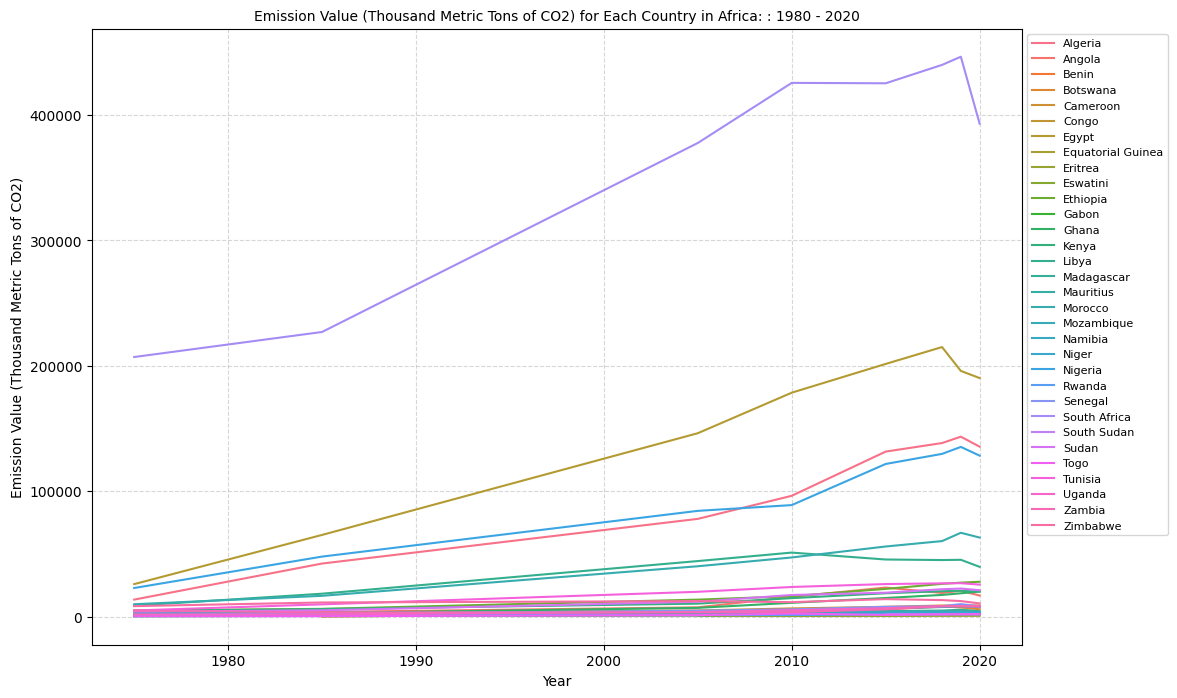

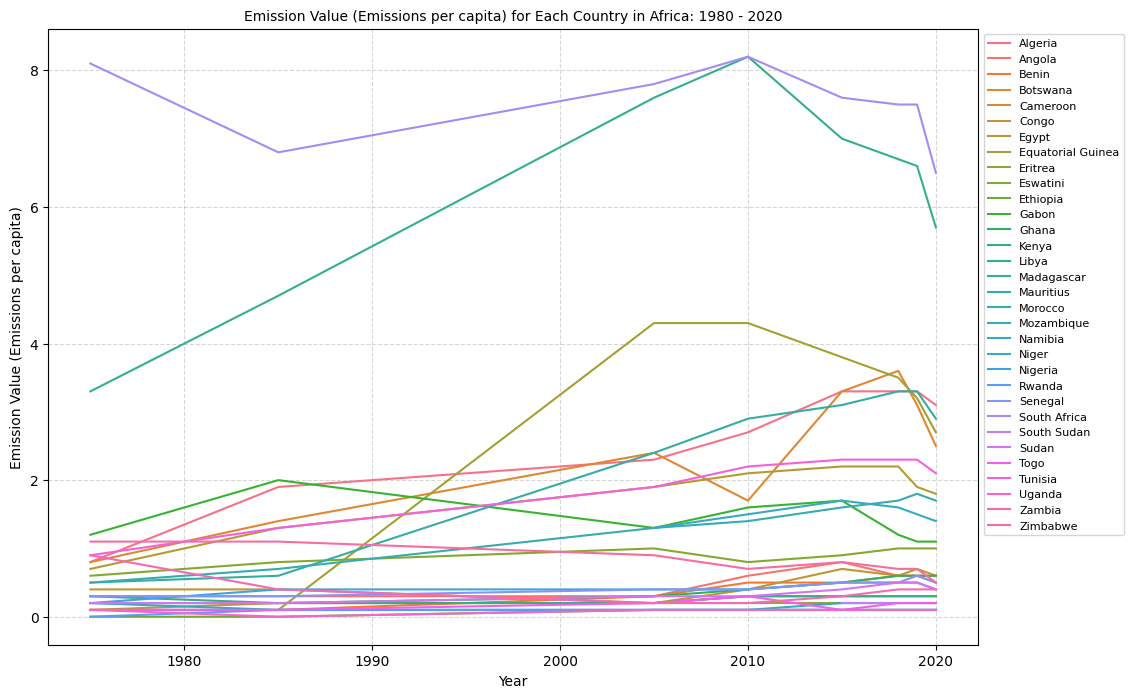

In [74]:
# Selecting relevant columns and filtering data for Africa
em_thousand_line_plot = emission_thousand.loc[emission_thousand['continent'] == "Africa", ["Country", "Year", "Value"]]

# Define a color palette for distinct colors
colors = sns.color_palette('husl', n_colors=len(em_thousand_line_plot['Country'].unique()))

# Create a line plot for each country
plt.figure(figsize=(12, 8))
for i, country in enumerate(em_thousand_line_plot['Country'].unique()):
    country_data = em_thousand_line_plot.loc[em_thousand_line_plot['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country, color=colors[i])

# Adding title and labels
plt.title('Emission Value (Thousand Metric Tons of CO2) for Each Country in Africa: : 1980 - 2020', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Emission Value (Thousand Metric Tons of CO2)')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Creating a custom legend layout
handles, labels = plt.gca().get_legend_handles_labels()
legend_columns = 4  # Number of columns in the legend grid
layout = [(i // legend_columns, i % legend_columns) for i in range(len(labels))]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

# Display the plot
plt.show()

# Selecting relevant columns and filtering data for Africa
em_per_capita_line_plot = emission_per_capita.loc[emission_per_capita['continent'] == "Africa", ["Country", "Year", "Value"]]

# Create a line plot for each country
plt.figure(figsize=(12, 8))
for i, country in enumerate(em_per_capita_line_plot['Country'].unique()):
    country_data = em_per_capita_line_plot.loc[em_per_capita_line_plot['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country, color=colors[i])

# Adding title and labels
plt.title('Emission Value (Emissions per capita) for Each Country in Africa: 1980 - 2020', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Emission Value (Emissions per capita)')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Creating a custom legend layout
handles, labels = plt.gca().get_legend_handles_labels()
layout = [(i // legend_columns, i % legend_columns) for i in range(len(labels))]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

# Display the plot
plt.show()


**Observation:**<br>
This graph above provides an overview of the African countries ranking in terms of CO2 emissions. Leading the list, South Africa demonstrates a substantial contribution to CO2 emissions, reflecting its industrial and economic activities. Following closely, Egypt driven by population density and economic development. Algeria's industrial activities and energy consumption contribute to its environmental impact. This finding highlights the necessity of sustainable development plans that both address environmental issues and promote continental economic expansion.

16) Study the trend to reveal continent contribution based on emission generation. Split the plot based on the metric of measurement for emission.
- Emissions (thousand metric tons of carbon dioxide) and 
- Emissions per capita (metric tons of carbon dioxide)

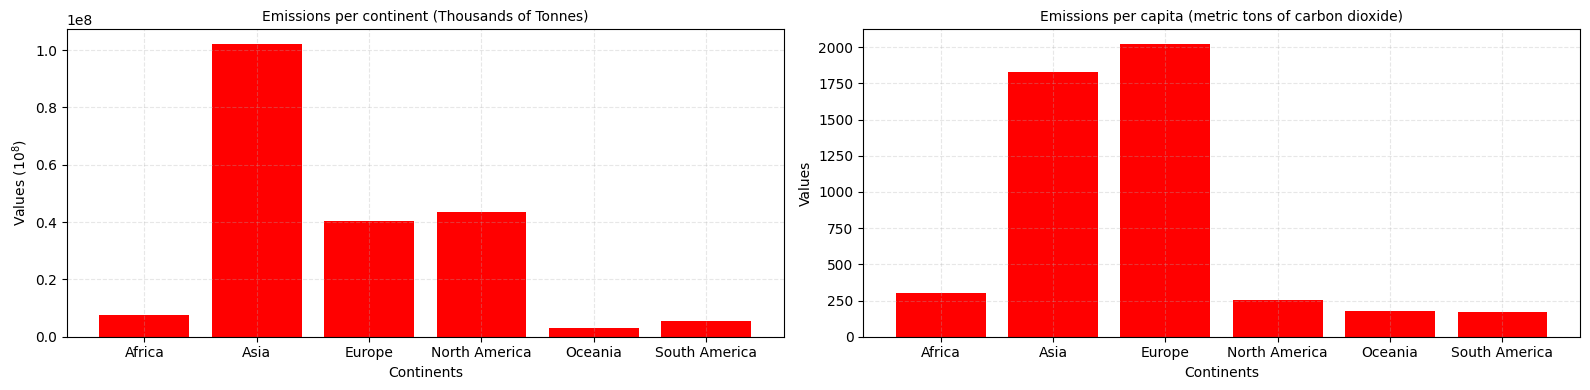

In [75]:

# Extracted data for emissions per continent
em_thousand_continent_extracted = emission_thousand.groupby("continent")[["Value"]].sum()
em_thousand_continent_extracted.reset_index(inplace=True)
em_thousand_continent_extracted.set_index(keys="continent", inplace=True)

em_per_capita_continent_extracted = emission_per_capita.groupby("continent")[["Value"]].sum()
em_per_capita_continent_extracted.reset_index(inplace=True)
em_per_capita_continent_extracted.set_index(keys="continent", inplace=True)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Plot for emissions per continent
axes[0].bar(em_thousand_continent_extracted.index, em_thousand_continent_extracted["Value"], color="red")
axes[0].set_title("Emissions per continent (Thousands of Tonnes)", fontsize=10)
axes[0].set_ylabel("Values ($10^8$)")
axes[0].set_xlabel("Continents")
axes[0].grid(True, linestyle="--", alpha=0.3)

# Plot for emissions per capita
axes[1].bar(em_per_capita_continent_extracted.index, em_per_capita_continent_extracted["Value"], color="red")
axes[1].set_title("Emissions per capita (metric tons of carbon dioxide)", fontsize=10)
axes[1].set_ylabel("Values")
axes[1].set_xlabel("Continents")
axes[1].grid(True, linestyle="--", alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()

The information presented suggests that, in terms of overall carbon emissions, Asia emerges as the most significant contributor among the continents, followed by North America and then Europe. This ranking indicates that Asia has the highest total carbon emissions among these continents, signifying a substantial collective output of carbon dioxide from various Asian countries.

However, when considering carbon emissions per capita, Europe stands out as the leading continent contributing the most in relation to the population sizes of its countries. This means that although Europe might not have the highest total emissions, when examining emissions relative to the population size, it demonstrates a greater contribution per person compared to other continents. This emphasizes that, on average, individuals within European countries tend to generate a higher amount of carbon emissions compared to individuals in other continents, considering the population density and the total carbon output.

17) Analyze Rwanda's emissions from 1975 to 2020. Does the observed contribution behavior enhance our understanding of the country's move to reduce environmental impact

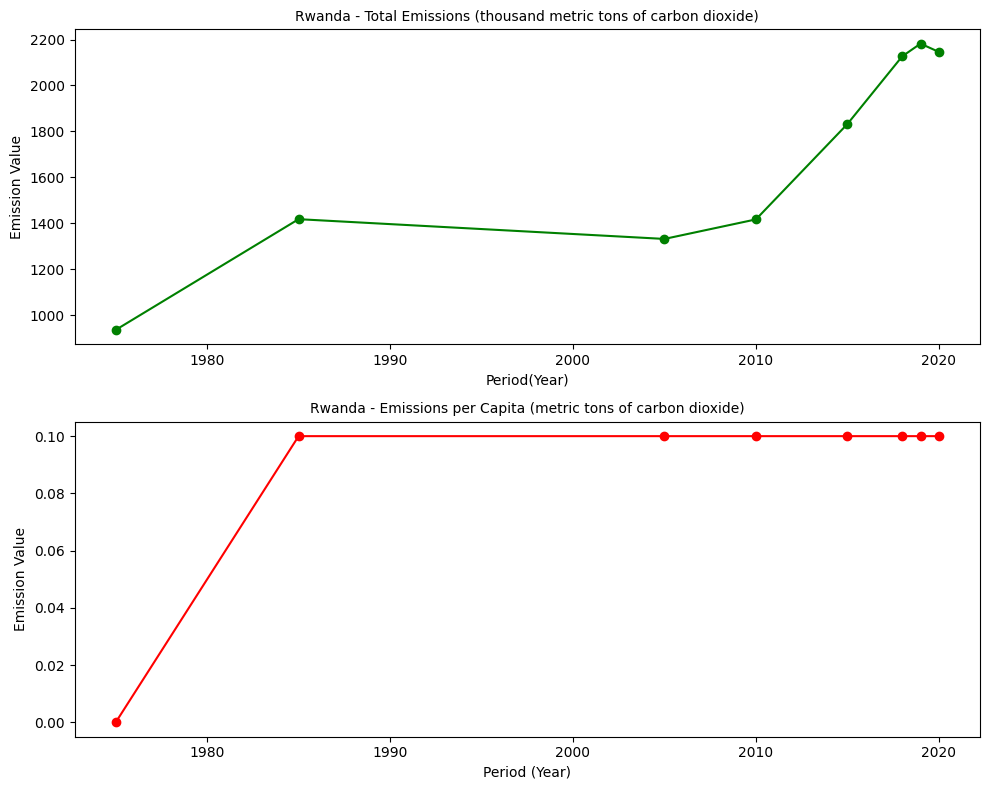

In [76]:
# Filter the dataframes to include only Rwanda
df_emissions_rwanda = df_emissions[df_emissions['Country'] == 'Rwanda']
df_emissions_per_capita_rwanda = df_emissions_per_capita[df_emissions_per_capita['Country'] == 'Rwanda']

# Plot Rwanda's emissions over 8 years
fig, axs = plt.subplots(2, figsize=(10, 8))

# Plot for total emissions
axs[0].plot(df_emissions_rwanda['Year'], df_emissions_rwanda['Value'], color="green", marker='o', linestyle='-')
axs[0].set_title('Rwanda - Total Emissions (thousand metric tons of carbon dioxide)', fontsize=10)
axs[0].set_xlabel("Period(Year)")
axs[0].set_ylabel("Emission Value")

# Plot for emissions per capita
axs[1].plot(df_emissions_per_capita_rwanda['Year'], df_emissions_per_capita_rwanda['Value'], color="red", marker='o', linestyle='-')
axs[1].set_title('Rwanda - Emissions per Capita (metric tons of carbon dioxide)', fontsize=10)
axs[1].set_xlabel("Period (Year)")
axs[1].set_ylabel("Emission Value")

plt.tight_layout()
plt.show()


The data indicates a noticeable upward trend in carbon emissions for Rwanda, specifically observed from 2005 to 2019. This period highlights a significant and consistent increase in the country's carbon dioxide emissions over these years.

This observed rise in carbon emissions for Rwanda suggests a progressive trend in its environmental impact, likely attributed to various factors such as economic development, industrial activities, changes in energy consumption patterns, or other contributing factors. This increase might signify a period of growth or changes in Rwanda's economy and infrastructure that led to higher carbon emissions during this timeframe.

18) Finding Outliers in the emissions datasets using IQR method

In [77]:
#  a function to find outliers using the IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#  outliers in the 'Emissions (thousand metric tons of carbon dioxide)' dataframe
outliers_emissions = find_outliers(df_emissions, 'Value')
print('Outliers in Emissions (thousand metric tons of carbon dioxide):')
outliers_emissions = outliers_emissions[['Country', 'Year', 'Value']]
outliers_emissions

Outliers in Emissions (thousand metric tons of carbon dioxide):


,Country,Year,Value
77,Australia,1985,223305.0
78,Australia,2005,368484.0
79,Australia,2010,396195.0
80,Australia,2015,384882.0
81,Australia,2018,395916.0
...,...,...,...
2146,United States of America,2019,4821298.0
2147,United States of America,2020,4324698.0
2205,Viet Nam,2018,239067.0
2206,Viet Nam,2019,287820.0


There are 168 outliers in Emissions (thousand metric tons of carbon dioxide) data. The presence of 168 outliers in the emissions dataset suggests a considerable number of data points that exhibit noteworthy deviations from the general trend or distribution of carbon emissions, highlighting potential irregularities or distinct observations within the dataset.

19. Rank and find out countries in Asia with the highest contribution in terms of CO2 Emission.

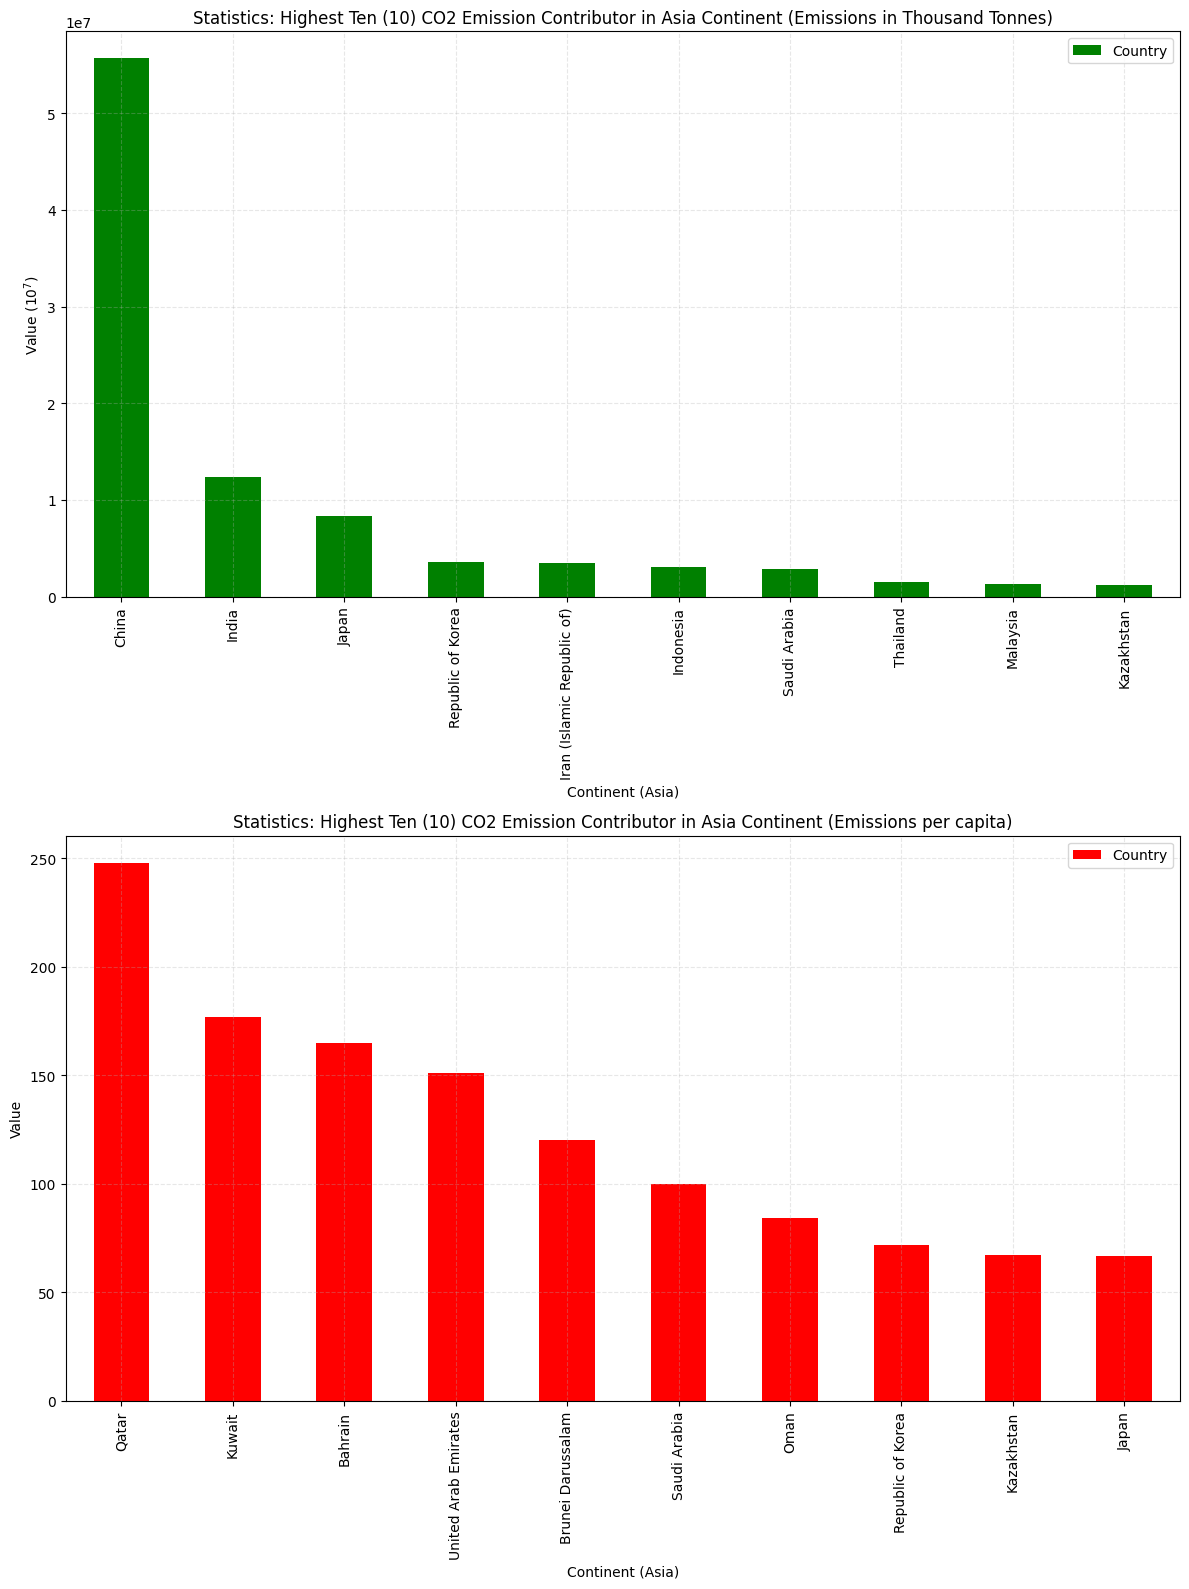

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Emissions in Thousand Tonnes for Africa
em_thousand_africa = emission_thousand[emission_thousand["continent"] == "Asia"]
em_thousand_africa = em_thousand_africa.groupby("Country")["Value"].sum().nlargest(10)
em_thousand_africa.sort_values(ascending=False, inplace=True)
em_thousand_africa.plot(kind="bar", ax=axes[0], color="green", label="Country")
axes[0].set_title('Statistics: Highest Ten (10) CO2 Emission Contributor in Asia Continent (Emissions in Thousand Tonnes)')
axes[0].set_xlabel("Continent (Asia)")
axes[0].set_ylabel("Value ($10^7$)")
axes[0].grid(True, linestyle="--", alpha=0.3)
axes[0].legend()

# Emissions per capita (metric tons of carbon dioxide) for Asia
em_per_capita_africa = emission_per_capita[emission_per_capita["continent"] == "Asia"]
em_per_capita_africa = em_per_capita_africa.groupby("Country")["Value"].sum().nlargest(10)
em_per_capita_africa.sort_values(ascending=False, inplace=True)
em_per_capita_africa.plot(kind="bar", ax=axes[1], color="red", label="Country")
axes[1].set_title('Statistics: Highest Ten (10) CO2 Emission Contributor in Asia Continent (Emissions per capita)')
axes[1].set_xlabel("Continent (Asia)")
axes[1].set_ylabel("Value")
axes[1].grid(True, linestyle="--", alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

Indeed, within the continent of Asia, China typically stands out for having the highest total carbon emissions among the countries in that region. China's large population and significant industrial and economic activities contribute to its status as the leading emitter of carbon dioxide in Asia and globally. It is followed by India.

On the other hand, Qatar is recognized for having the highest carbon emissions per capita within the Asian region. Despite its relatively smaller population size compared to countries like China, Qatar's economy, which heavily relies on industries like oil and gas, results in exceptionally high levels of carbon emissions per person, making it a standout country in terms of emissions per capita within the Asian continent.

In [79]:
emission_per_capita["continent"].unique()

array(['Europe', 'Africa', 'South America', 'Oceania', 'Asia', nan,
       'North America'], dtype=object)

20. Rank and find out countries in Europe with the lowest contribution in terms of CO2 Emission. 

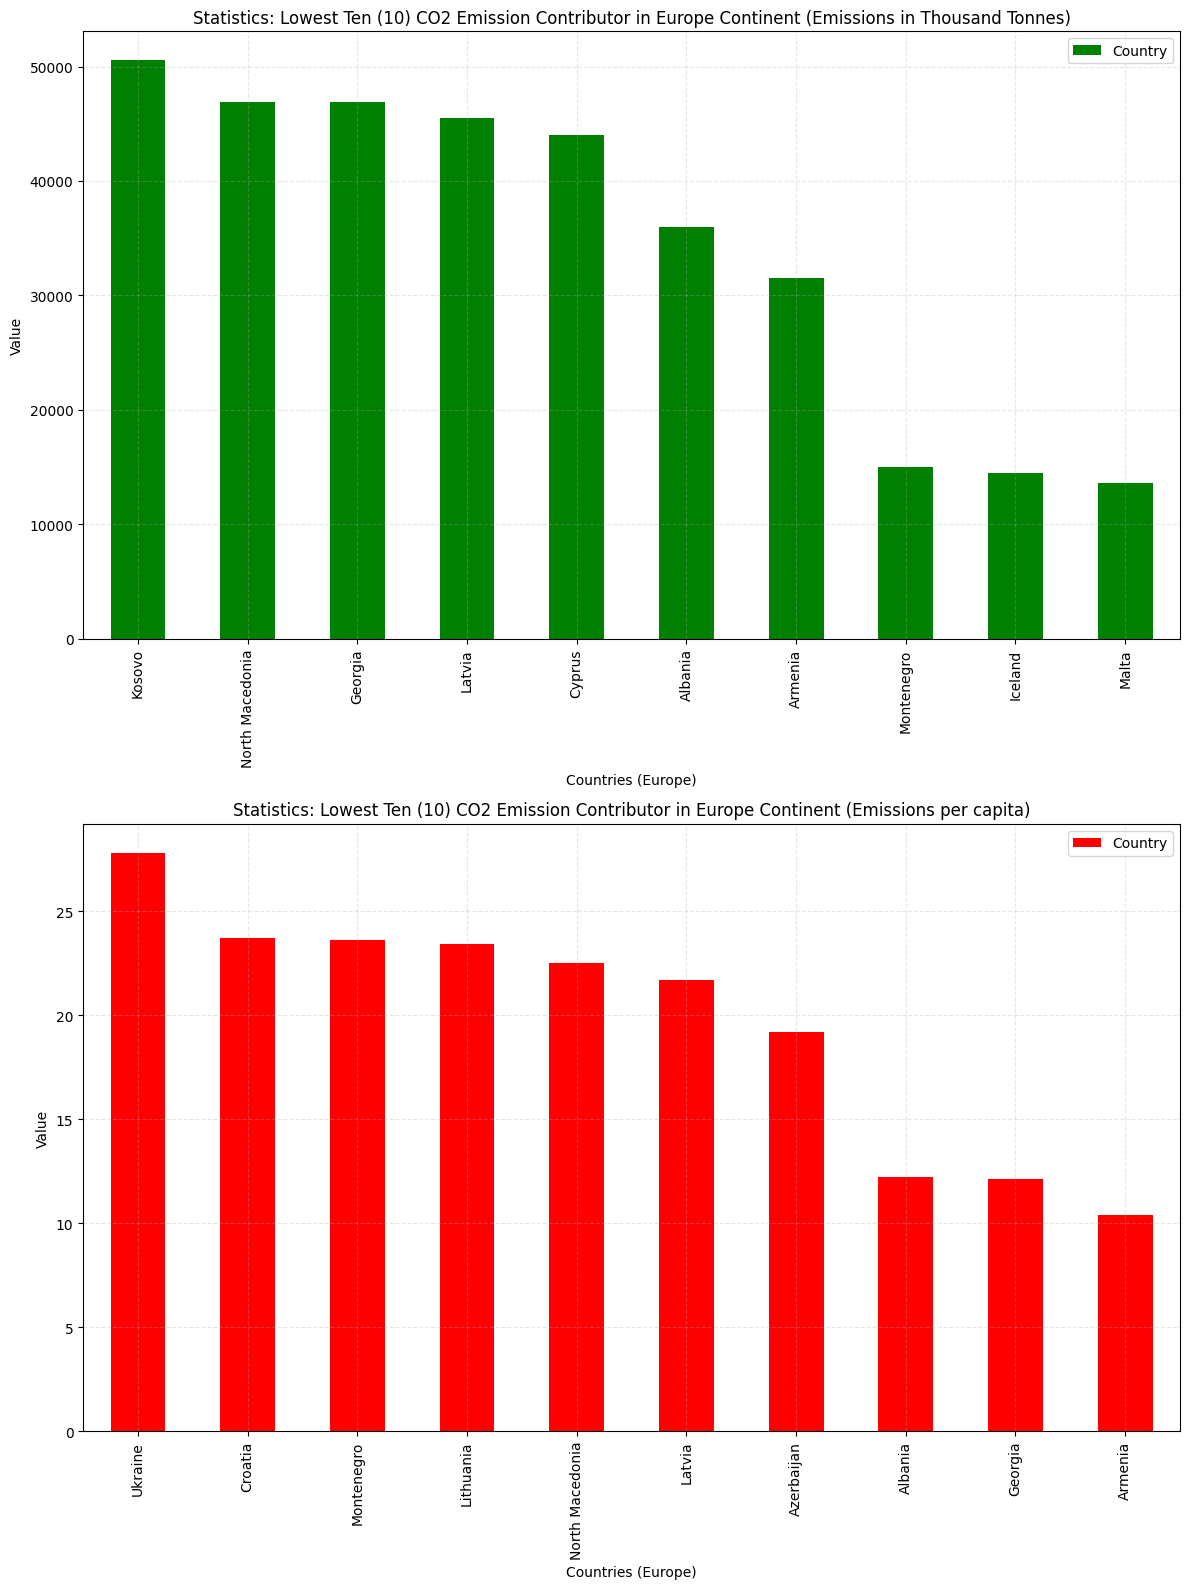

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Emissions in Thousand Tonnes for Europe
em_thousand_africa = emission_thousand[emission_thousand["continent"] == "Europe"]
em_thousand_africa = em_thousand_africa.groupby("Country")["Value"].sum().nsmallest(10)
em_thousand_africa.sort_values(ascending=False, inplace=True)
em_thousand_africa.plot(kind="bar", ax=axes[0], color="green", label="Country")
axes[0].set_title('Statistics: Lowest Ten (10) CO2 Emission Contributor in Europe Continent (Emissions in Thousand Tonnes)')
axes[0].set_xlabel("Countries (Europe)")
axes[0].set_ylabel("Value")
axes[0].grid(True, linestyle="--", alpha=0.3)
axes[0].legend()

# Emissions per capita (metric tons of carbon dioxide) for Asia
em_per_capita_africa = emission_per_capita[emission_per_capita["continent"] == "Europe"]
em_per_capita_africa = em_per_capita_africa.groupby("Country")["Value"].sum().nsmallest(10)
em_per_capita_africa.sort_values(ascending=False, inplace=True)
em_per_capita_africa.plot(kind="bar", ax=axes[1], color="red", label="Country")
axes[1].set_title('Statistics: Lowest Ten (10) CO2 Emission Contributor in Europe Continent (Emissions per capita)')
axes[1].set_xlabel("Countries (Europe)")
axes[1].set_ylabel("Value")
axes[1].grid(True, linestyle="--", alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

**Observation:**<br>
The plot "Statistics: Lowest Ten (10) CO2 Emission Contributor in Europe Continent (Emissions in Thousand Tonnes)" shows at least ten countries with the lowest carbon emission in the Europe continent. The least contributor in the continent is "Malta".<br>  

The plot "Statistics: Lowest Ten (10) CO2 Emission Contributor in Europe Continent (Emissions per capita)" shows at least ten countries with the lowest carbon emission in the Europe continent. The least contributor in the continent is "Armenia".

Within the continent of Europe, Malta typically registers as one of the countries with relatively lower total carbon emissions among the nations in that region. Malta's smaller size and diverse energy sources contribute to its comparatively lower overall carbon emissions compared to other European countries.

Armenia, on the other hand, is recognized for having the lowest carbon emissions per capita within the European continent. This means that, on average, individuals in Armenia produce the least amount of carbon emissions per person among the European countries, indicating a relatively lower environmental impact in terms of carbon emissions per capita compared to other nations in Europe.